Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


In [1]:
# Importing necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Ignore the Warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Dataset.
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head(5)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# To check the Dataset shape.
df.shape

(30, 17)

In [5]:
# we have 30 rows and 17 columns in the Dataset.

In [6]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
# To check the Columns.
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
# Info about Columns.
# w- Number of wins done by Pitcher  and it is our output variable.



In [9]:
# To check the DataTye of all columns.
df.dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
# we can see all the columns in Int values and only ERA column is having float values. 
#we dont have to change any datatype.We can analyze further with Visualization.

In [12]:
# To Check Dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [13]:
# As per this there are no null values in the columns.however we will confirm further with Analysis.

# Data Integrity Check.                   

In [14]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [15]:
# Observations: There is No Null values in the Dataset.

In [16]:
# To check for widespace,special characters in the Dataset.

In [17]:
df.isin(['NA','n/a','-',',','?',' ']).any().sum()

0

In [18]:
# observation : There is No special Characeter in the dataset.

In [19]:
# Unique Values present in each columns
print("The Number of Unique Values present in the column:",df['R'].nunique())
df['R'].unique() 


The Number of Unique Values present in the column: 28


array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

In [20]:
# Unique values present at the runs.

In [21]:
print("The Number of Unique Values present in the column:",df['AB'].nunique())
df['AB'].unique()

The Number of Unique Values present in the column: 29


array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [22]:
# Unique values present at Bat at Time columns.

In [23]:
print("The Number of Unique Values present in the column:",df['H'].nunique())
df['H'].unique()

The Number of Unique Values present in the column: 29


array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [24]:
# These are the unique values present in the Hit Columns.

In [25]:
print("The Number of Unique Values present in the column:",df['2B'].nunique())
df['2B'].unique()


The Number of Unique Values present in the column: 22


array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

In [26]:
# These are the unique values present in the second Base columns.

In [27]:
print("The Number of Unique Values present in the column:",df['3B'].nunique())
df['3B'].unique()

The Number of Unique Values present in the column: 23


array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

In [28]:
# These are the unique values present in the third Base columns.

In [29]:
print("The Number of Unique Values present in the column:",df['HR'].nunique())
df['HR'].unique()

The Number of Unique Values present in the column: 27


array([139, 156, 141, 136, 151, 232, 212, 217, 167, 161, 172, 230, 176,
       198, 146, 137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148,
       186], dtype=int64)

In [30]:
# These are the unique values present in the Home runs.

In [31]:
print("The Number of Unique Values present in the column:",df['BB'].nunique())
df['BB'].unique()

The Number of Unique Values present in the column: 29


array([383, 439, 533, 404, 455, 570, 554, 418, 436, 478, 503, 486, 435,
       475, 506, 461, 567, 412, 496, 488, 539, 375, 471, 387, 563, 457,
       490, 426, 388], dtype=int64)

In [32]:
# These are the unique values present in the Base on Balls.

In [33]:
print("The Number of Unique Values present in the column:",df['SO'].nunique())
df['SO'].unique()

The Number of Unique Values present in the column: 29


array([ 973, 1264, 1157, 1231, 1259, 1151, 1227, 1331, 1310, 1148, 1233,
       1392, 1150, 1336, 1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344,
       1107, 1274, 1258, 1159, 1312, 1327, 1283], dtype=int64)

In [34]:
# These are the unique values present in the Strikeout column.

In [35]:
print("The Number of Unique Values present in the column:",df['SB'].nunique())
df['SB'].unique()

The Number of Unique Values present in the column: 27


array([104,  70,  86,  68,  83,  88,  63,  44,  87,  71, 101, 121,  52,
        69,  78,  98,  95,  84, 134,  51,  57, 112,  59,  93, 132,  82,
        97], dtype=int64)

In [36]:
# These are the unique valsues present in the Stole Base column.

In [37]:
print("The Number of Unique Values present in the column:",df['RA'].nunique())
df['RA'].unique()

The Number of Unique Values present in the column: 30


array([641, 700, 640, 701, 803, 670, 698, 693, 642, 753, 733, 618, 675,
       726, 729, 525, 596, 608, 737, 754, 613, 635, 678, 760, 809, 595,
       627, 713, 731, 844], dtype=int64)

In [38]:
# These are the Unique values present in the column Run Average column.

In [39]:
print("The Number of Unique Values present in the column:",df['ER'].nunique())
df['ER'].unique()

The Number of Unique Values present in the column: 30


array([601, 653, 584, 643, 746, 609, 652, 646, 604, 694, 680, 572, 630,
       677, 664, 478, 532, 546, 682, 700, 557, 577, 638, 698, 749, 553,
       597, 659, 655, 799], dtype=int64)

In [40]:
# These are the Unique vlues present in the Earned Run Column.

In [41]:
print("The Number of Unique Values present in the column:",df['ERA'].nunique())
df['ERA'].unique()

The Number of Unique Values present in the column: 30


array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

In [42]:
# The Unique values present in the column in Earned Run Average column.

In [43]:
print("The Number of Unique Values present in the column:",df['CG'].nunique())
df['CG'].unique()

The Number of Unique Values present in the column: 9


array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [44]:
# There are 09 unique Values present in Complete Game column

In [45]:
print("The Number of Unique Values present in the column:",df['SHO'].nunique())
df['SHO'].unique()

The Number of Unique Values present in the column: 12


array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

In [46]:
# There are 12 unique values present in the Shutout column.

In [47]:
print("The Number of Unique Values present in the column:",df['SV'].nunique())
df['SV'].unique()

The Number of Unique Values present in the column: 20


array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

In [48]:
# There are 20 Unique values present in the Save Column.

In [49]:
print("The Number of Unique Values present in the column:",df['E'].nunique())
df['E'].unique()

The Number of Unique Values present in the column: 21


array([ 88,  86,  79, 101,  93,  77,  95,  97, 119,  85,  94, 126,  96,
       122, 111, 116,  90, 117,  75,  78,  92], dtype=int64)

In [50]:
# There are 21 values present in the Errors Column

# Statistical Summary

In [51]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [52]:
# Observations:
#1. Count values are same for all the columns.
# 2. StD Values are high in few columns,which means skewness is present and will analyze in EDA Further.
#  Max columns values present in few columns ('R','H','so','SB','SHO','E') are far from 75% ,which means outliers are present in the Dataset.




# Duplicate Values Check

In [53]:
# To Check any duplicate Values.
df.duplicated().sum()

0

In [54]:
# To reconfirm the Duplicates
df.drop_duplicates(inplace=True)

In [55]:
df.shape  # after dropping the duplicate values,we just checking the shape of the Dataset.

(30, 17)

# EDA

# Univariate Analysis


In [56]:
df.columns



Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


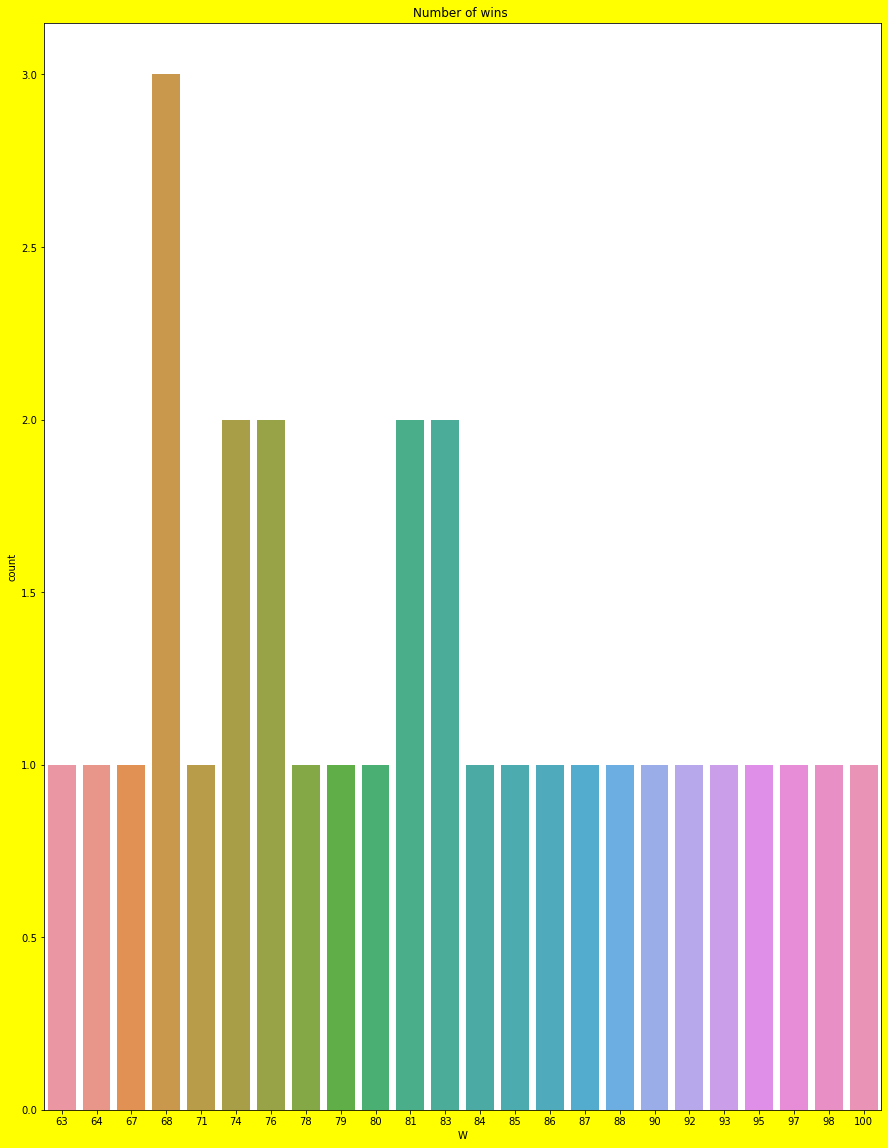

In [57]:
# To Check the countplot of our Target Variable.
print(df['W'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['W'])
plt.title('Number of wins ')
plt.show()


In [58]:
#Observations:
# We Observed 3 times, 68 is the Maximum number of Wins.
# We also obserseved 2 times,(74,76,81,83) is the second maximum number of Wins.

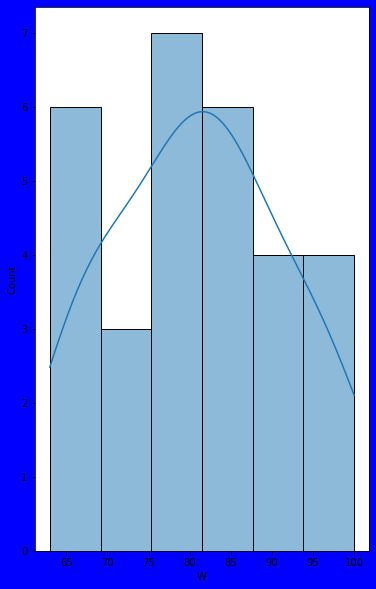

In [59]:
# Data Distribution of column:W
plt.figure(figsize=(6,10),facecolor='blue')
sns.histplot(x=df['W'],kde='True')
plt.show()


In [60]:
# Observations:
# The Data is didtributed normally when the Number of Win ranges from 60 to 100.

689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


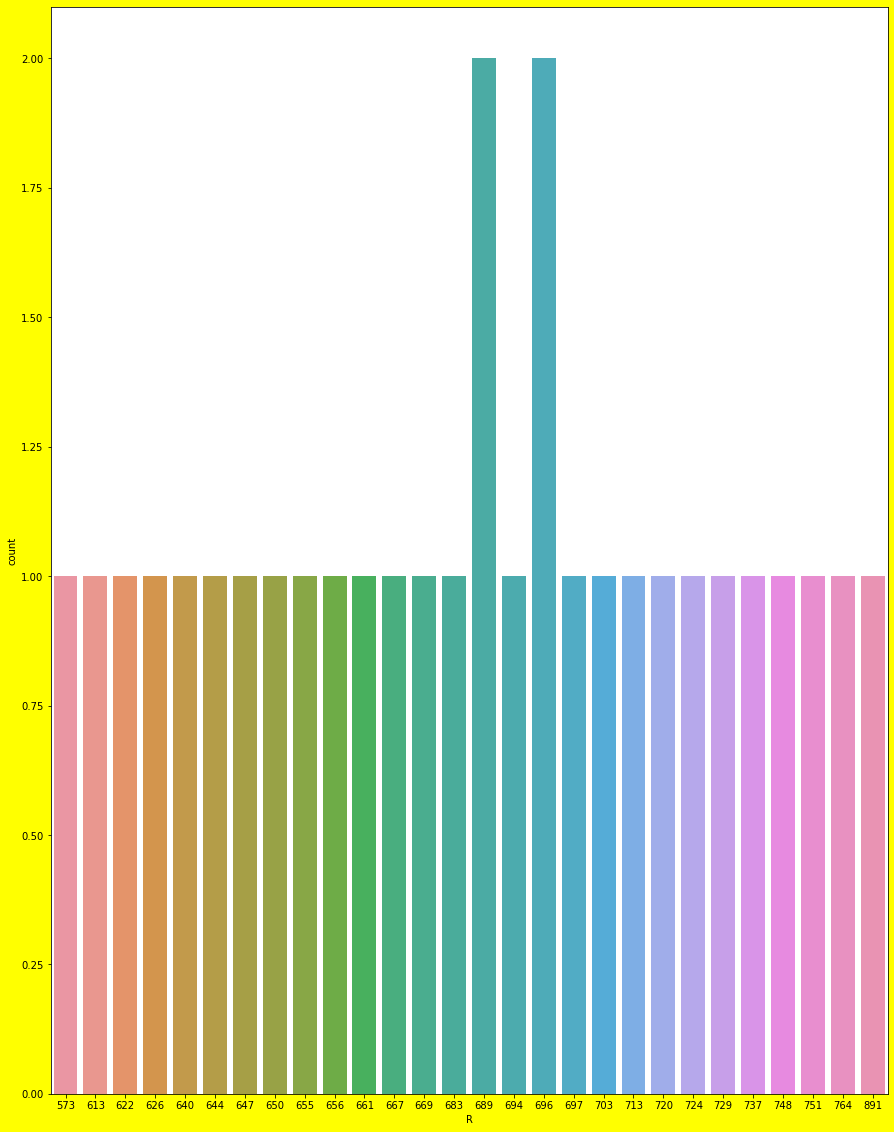

In [61]:
# To Check the countplot of df['R']

print(df['R'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['R'])
plt.show()

In [62]:
# Observations:
# The Highest Runs is 689 and 696,observed 2 times 

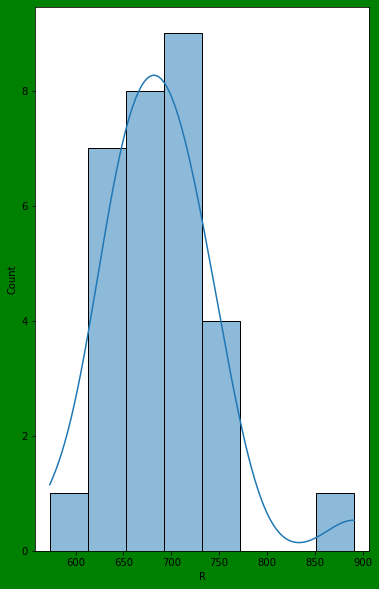

In [63]:
plt.figure(figsize=(6,10),facecolor='green')
sns.histplot(x=df['R'],kde='True')
plt.show()

In [64]:
# Observations:
# Data from 600 to 800 follows normal distribution 
# Data from 800 to 900 follows skewness in the right.

5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


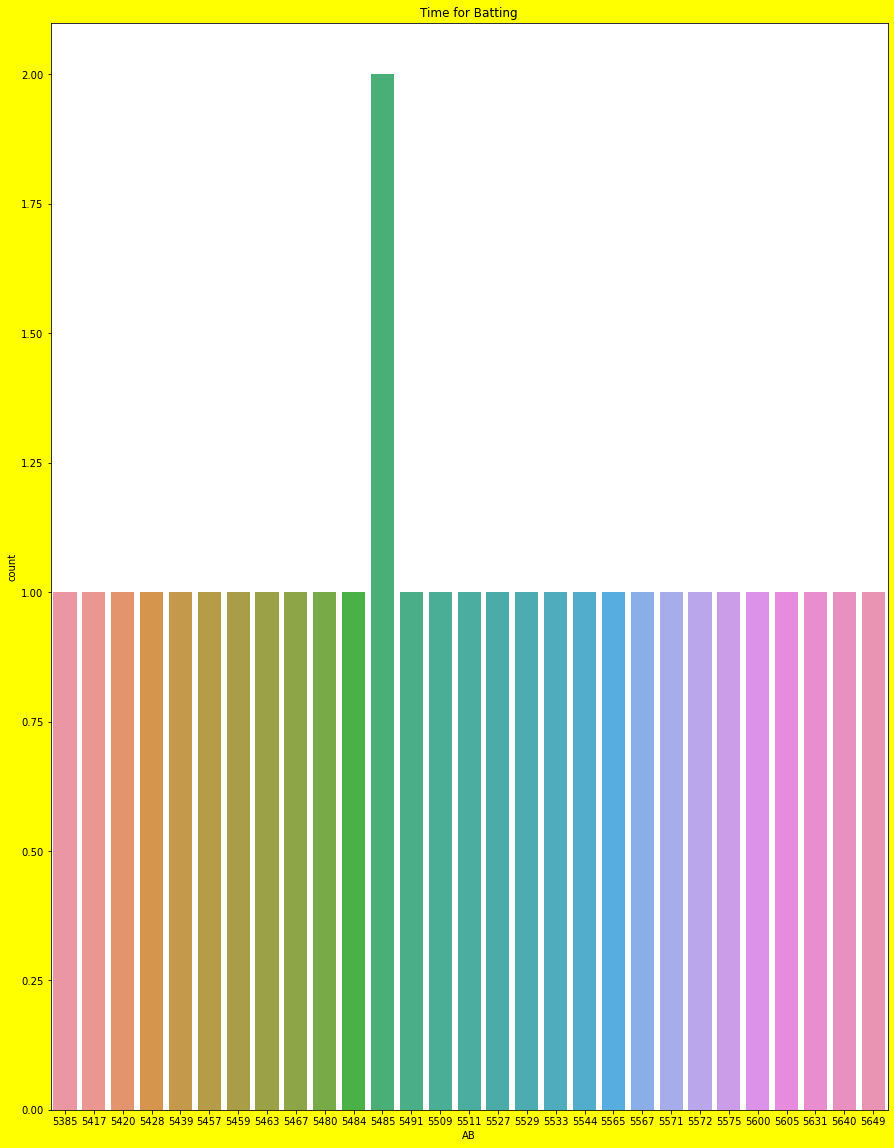

In [65]:
print(df['AB'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['AB'])
plt.title('Time for Batting')
plt.show()


In [66]:
# Observations:
#Total time reached by the batter,(maybe hit or error ) is recorded two times when the time is 5485.


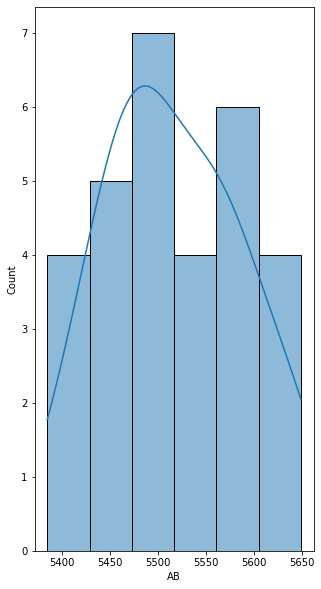

In [67]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['AB'],element='bars',kde="True")
plt.show()

In [68]:
# Observations:
# This plot shows that(Time At Bat )is following normal distribution from 5400 to 5650.

1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1
1379    1
1331    1
1419    1
1495    1
1383    1
1370    1
1397    1
1480    1
1515    1
1381    1
1395    1
1479    1
Name: H, dtype: int64


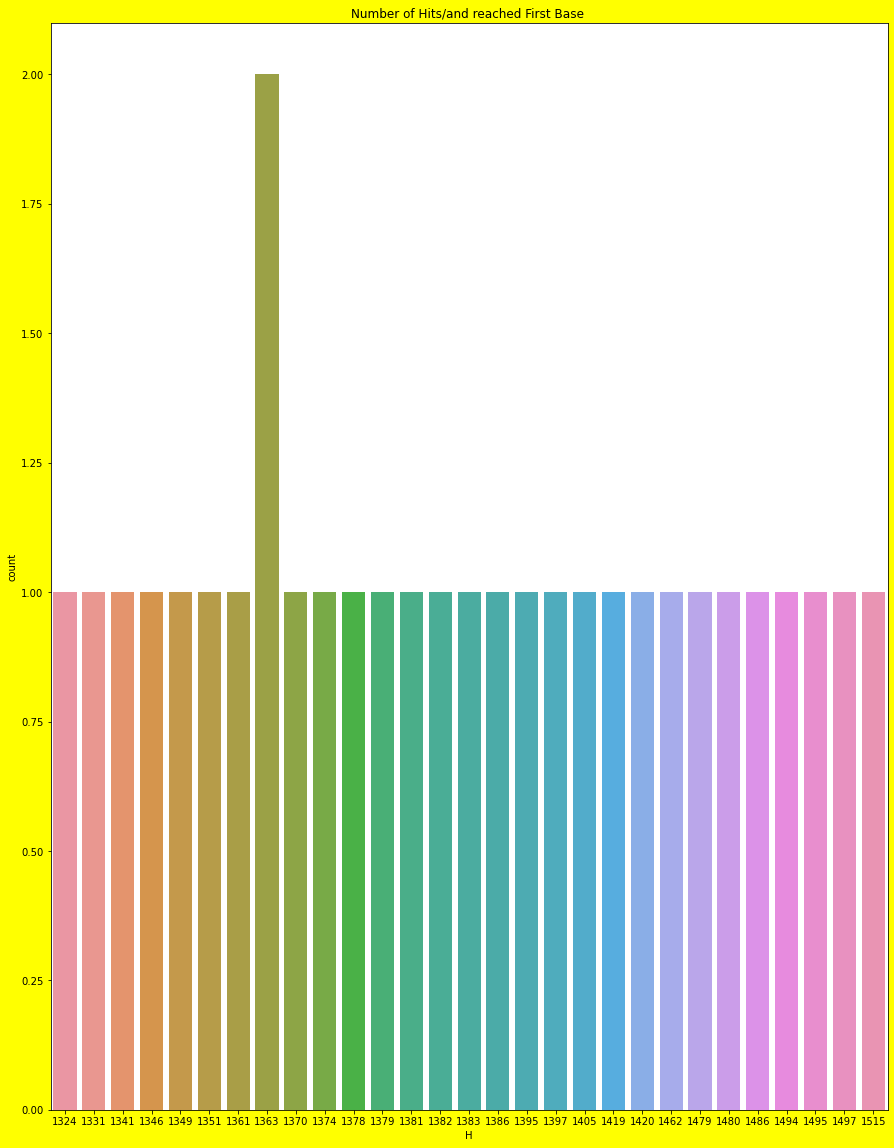

In [69]:
print(df['H'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['H'])
plt.title('Number of Hits/and reached First Base ')
plt.show()

In [70]:
# Observations:
# 1363 hits done by the batter and reached the First base.and 2 times win is observed on this First Base(when 1363hits done by Batter)


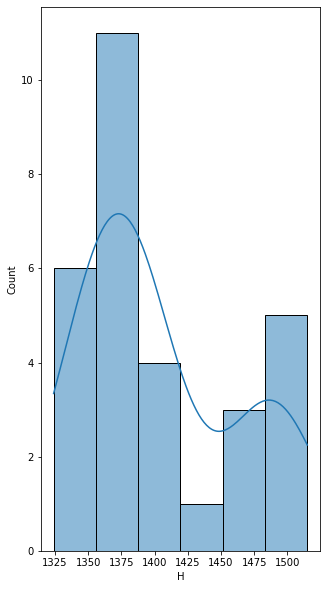

In [71]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['H'],element='bars',kde="True")
plt.show()

In [72]:
# Observations:
# This Hits column is having normal distribution ranging from (1325 to 1450)
# This column is having skewness ranging from (1450 to 1500)


272    3
260    2
289    2
278    2
277    2
274    2
288    2
300    1
292    1
251    1
236    1
265    1
295    1
257    1
243    1
262    1
279    1
294    1
246    1
308    1
303    1
263    1
Name: 2B, dtype: int64


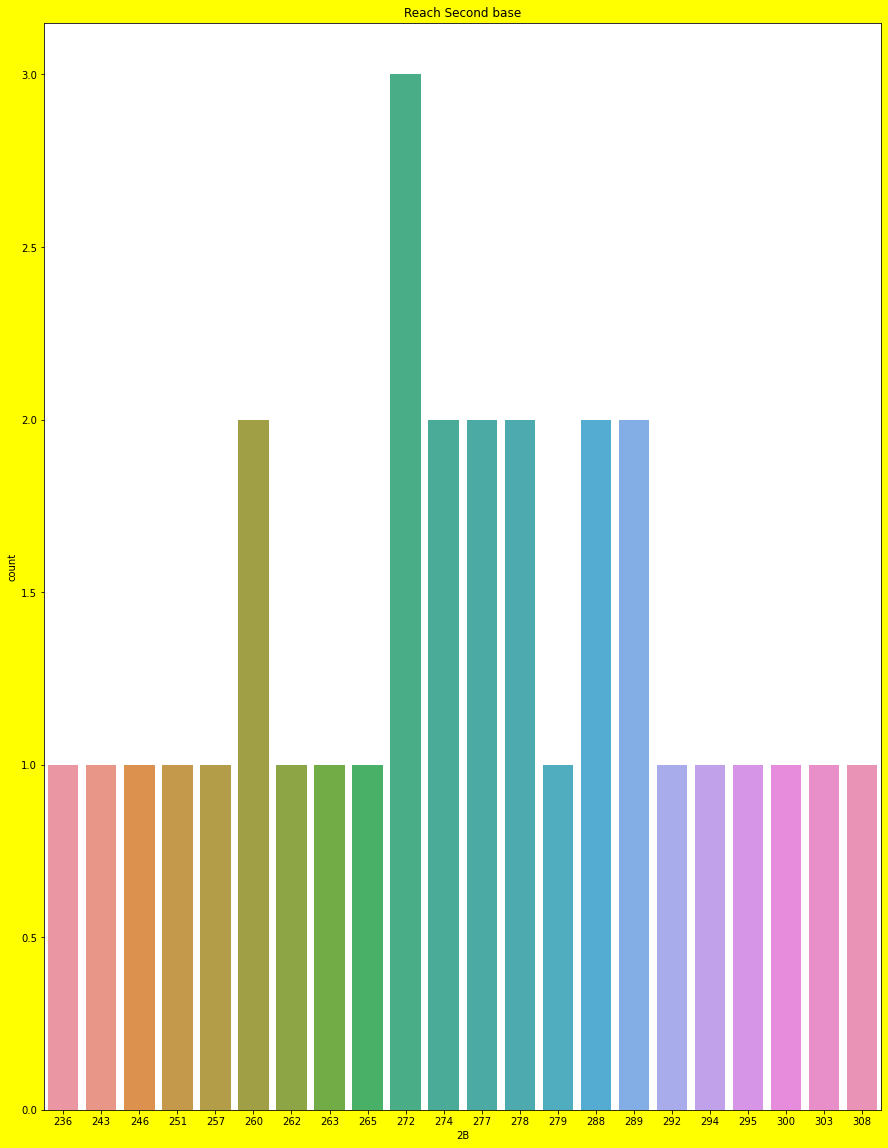

In [73]:
print(df['2B'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['2B'])
plt.title('Reach Second base')
plt.show()

In [74]:
# Observations:
# 03 times it is observed when the batter hits the ball and reaches the second Base@ 272 hits .
#  without the contribution of fielding errorprint
# 02 times it is observed when the batter hits the ball and reaches the second Base @"260","274","278","288","299" hits.
#  without the contribution of fielding errorprint


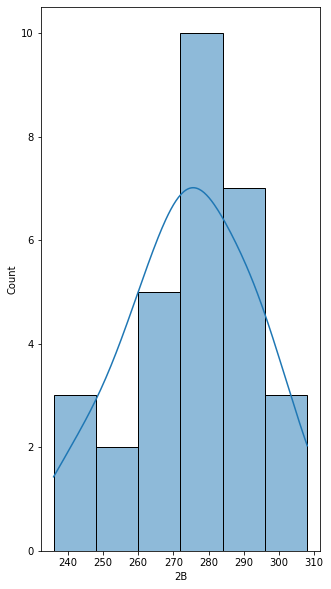

In [75]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['2B'],element='bars',kde="True")
plt.show()

In [76]:
# Observations:
# The Data in "2B" Column follows Normal Distribution.

27    3
39    2
49    2
17    2
32    2
26    2
42    1
48    1
37    1
18    1
40    1
13    1
34    1
30    1
21    1
46    1
22    1
44    1
33    1
20    1
19    1
29    1
36    1
Name: 3B, dtype: int64


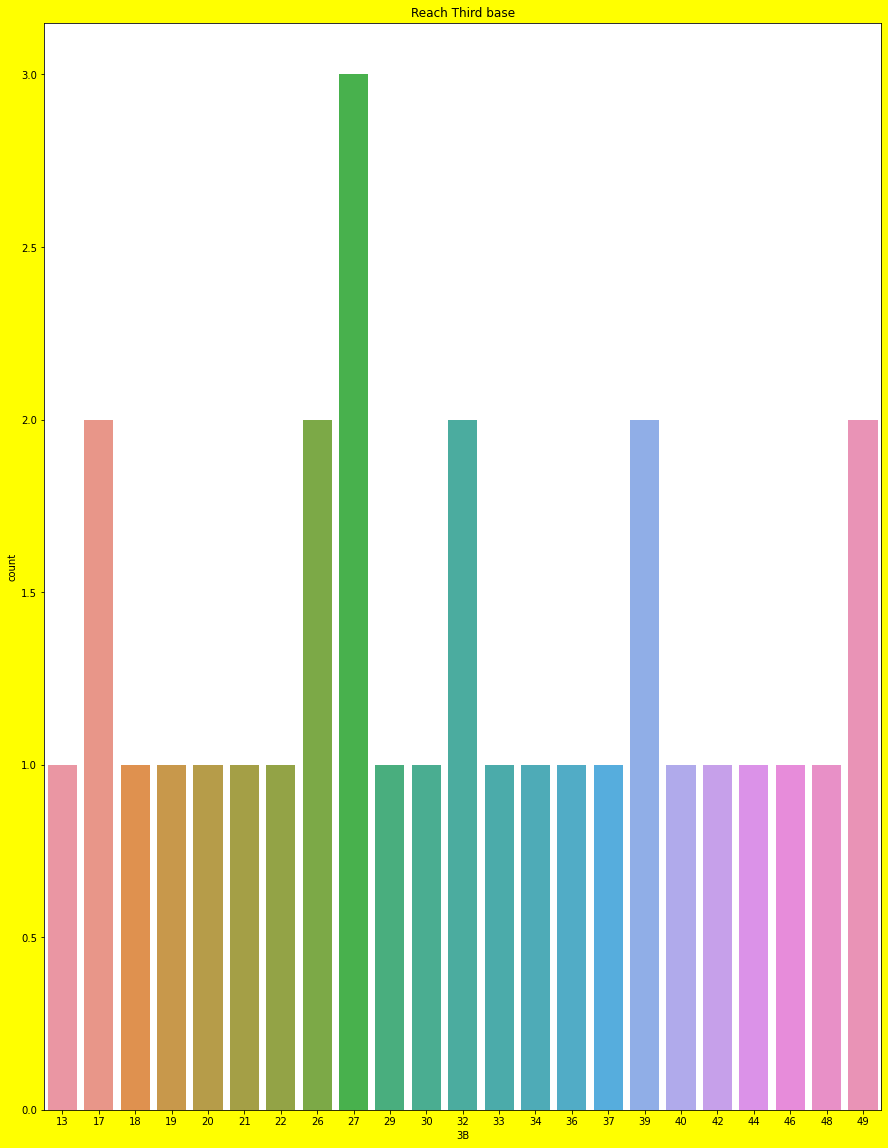

In [77]:
print(df['3B'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['3B'])
plt.title('Reach Third base')
plt.show()

In [78]:
# Observations:
# It is observed 03 times that the batter reaches the Third Base,without contribution of fielding error @ 27 hits
# It is observed 02 times that the batter reaches the Third Base,without contribution of fielding error  @ "17","32","26","39","49" hits

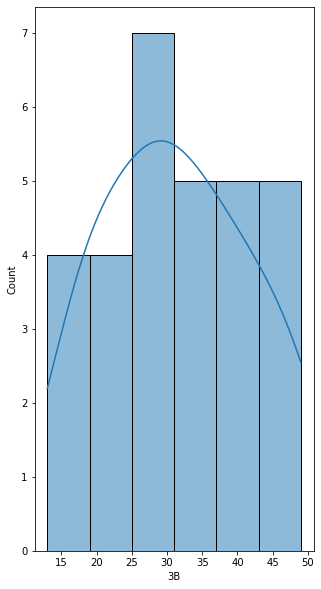

In [79]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['3B'],element='bars',kde="True")
plt.show()

In [80]:
# Observations:
# The Data in the column "3B" follows Normal Distribution.

136    2
167    2
177    2
139    1
137    1
148    1
154    1
187    1
130    1
100    1
120    1
145    1
171    1
140    1
198    1
146    1
156    1
176    1
230    1
172    1
161    1
217    1
212    1
232    1
151    1
141    1
186    1
Name: HR, dtype: int64


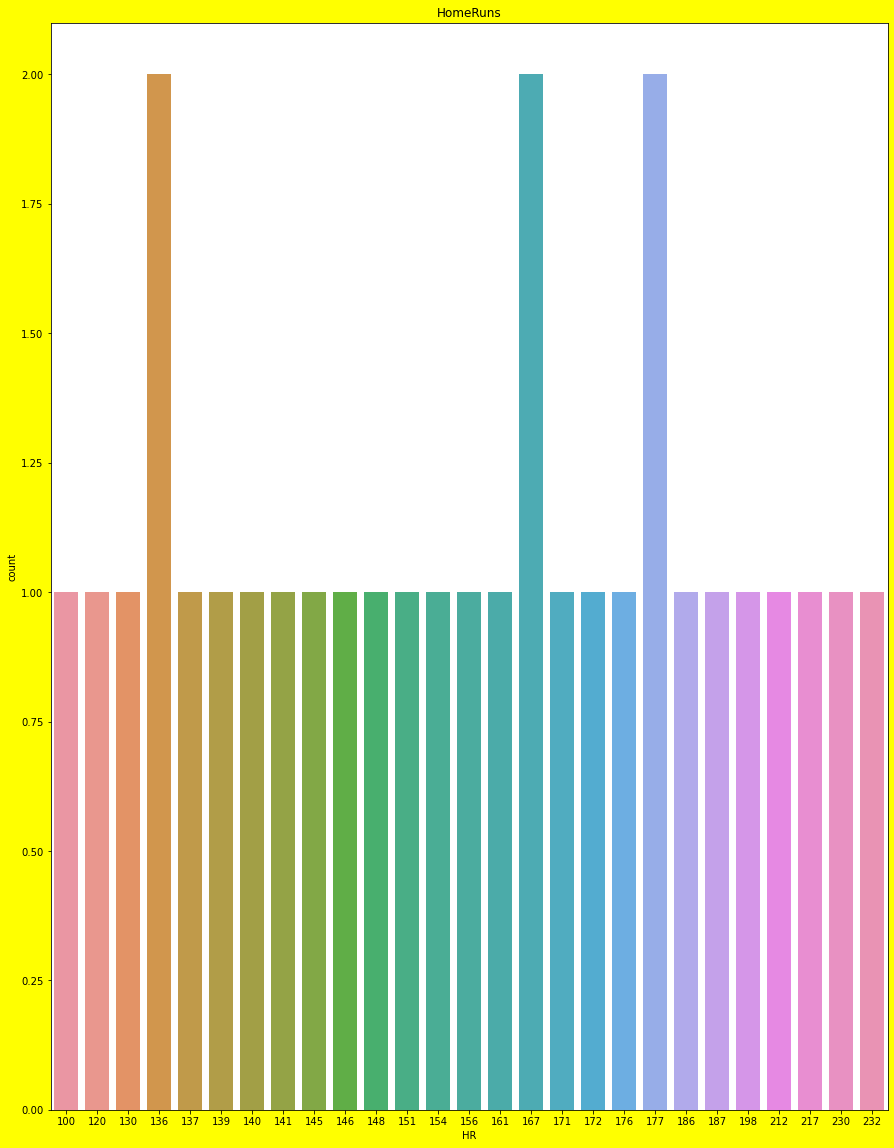

In [81]:
print(df['HR'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['HR'])
plt.title('HomeRuns')
plt.show()

In [82]:
# Observtions:
# It is been observed that 02 times ("136,167",'167') hits on which the batter successfully touched all four bases,
# without the contribution of a fielding error.

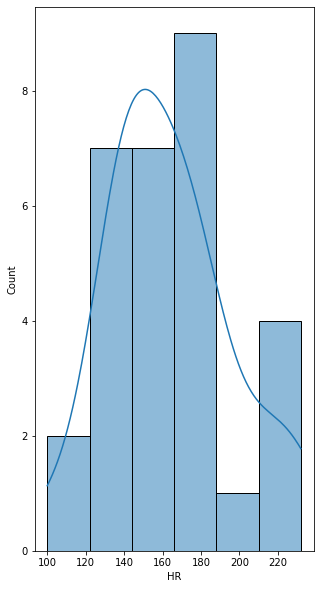

In [83]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['HR'],element='bars',kde="True")
plt.show()

In [84]:
# Observations:
# The Data in column"HR " follows normal Distribution when it ranges from 100 t0 210 hits
# The Data is skewed in right when the hits follws the range(210 to 220)

478    2
383    1
461    1
426    1
490    1
457    1
563    1
387    1
471    1
375    1
539    1
488    1
496    1
412    1
567    1
506    1
439    1
475    1
435    1
486    1
503    1
436    1
418    1
554    1
570    1
455    1
404    1
533    1
388    1
Name: BB, dtype: int64


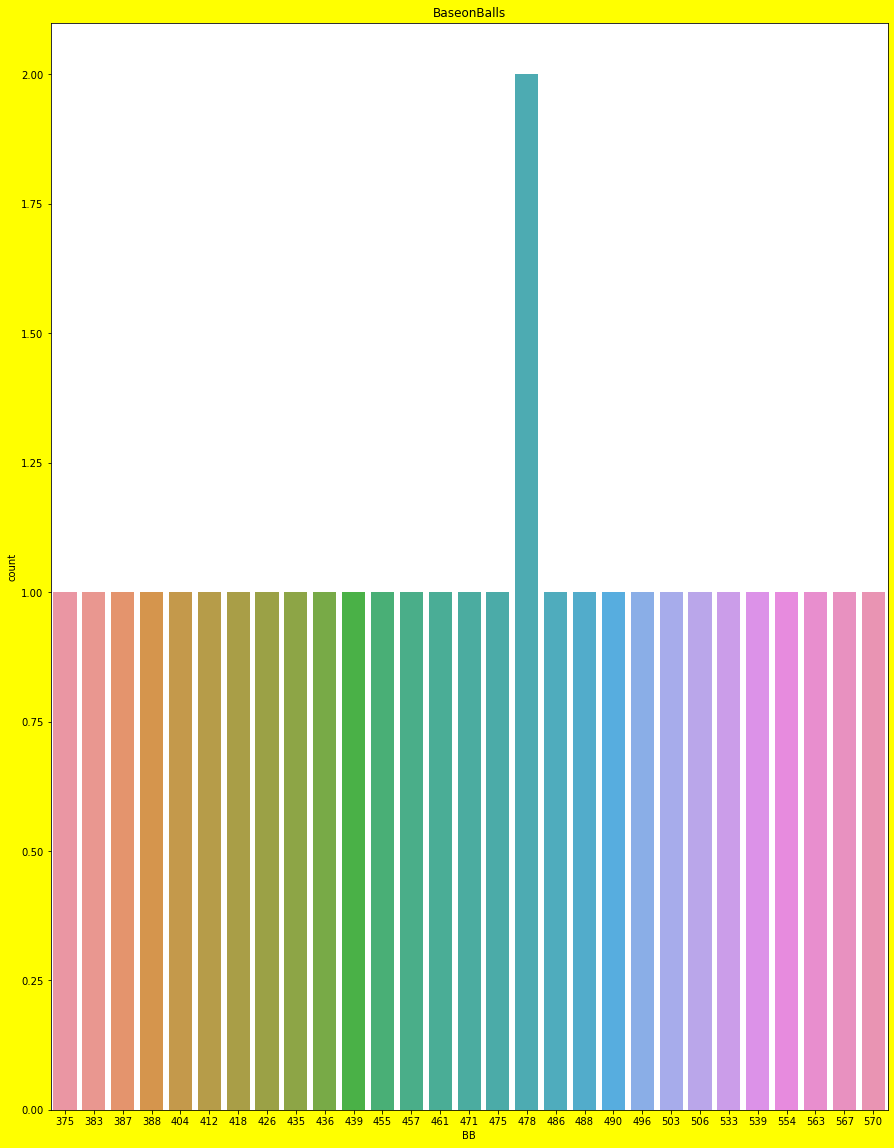

In [85]:
print(df['BB'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['BB'])
plt.title('BaseonBalls')
plt.show()

In [86]:
# Observations:
#It is observed 02 times, when hitter not swinging at four pitches called out of the strike zone and awarded first base.@ 478hits

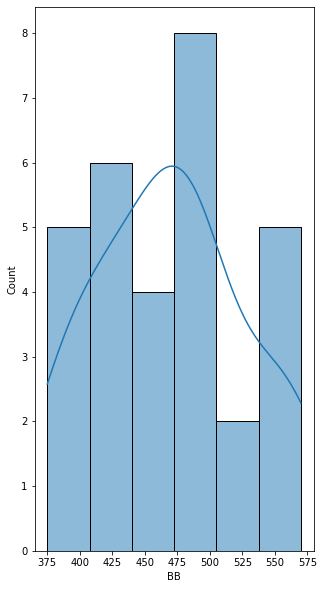

In [87]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['BB'],element='bars',kde="True")
plt.show()

In [88]:
#Observations:
# The Data in the column follws normaldistribution from range(375 to 575)hits

1150    2
973     1
1267    1
1327    1
1312    1
1159    1
1258    1
1274    1
1107    1
1344    1
1290    1
1255    1
1299    1
1518    1
1322    1
1119    1
1264    1
1336    1
1392    1
1233    1
1148    1
1310    1
1331    1
1227    1
1151    1
1259    1
1231    1
1157    1
1283    1
Name: SO, dtype: int64


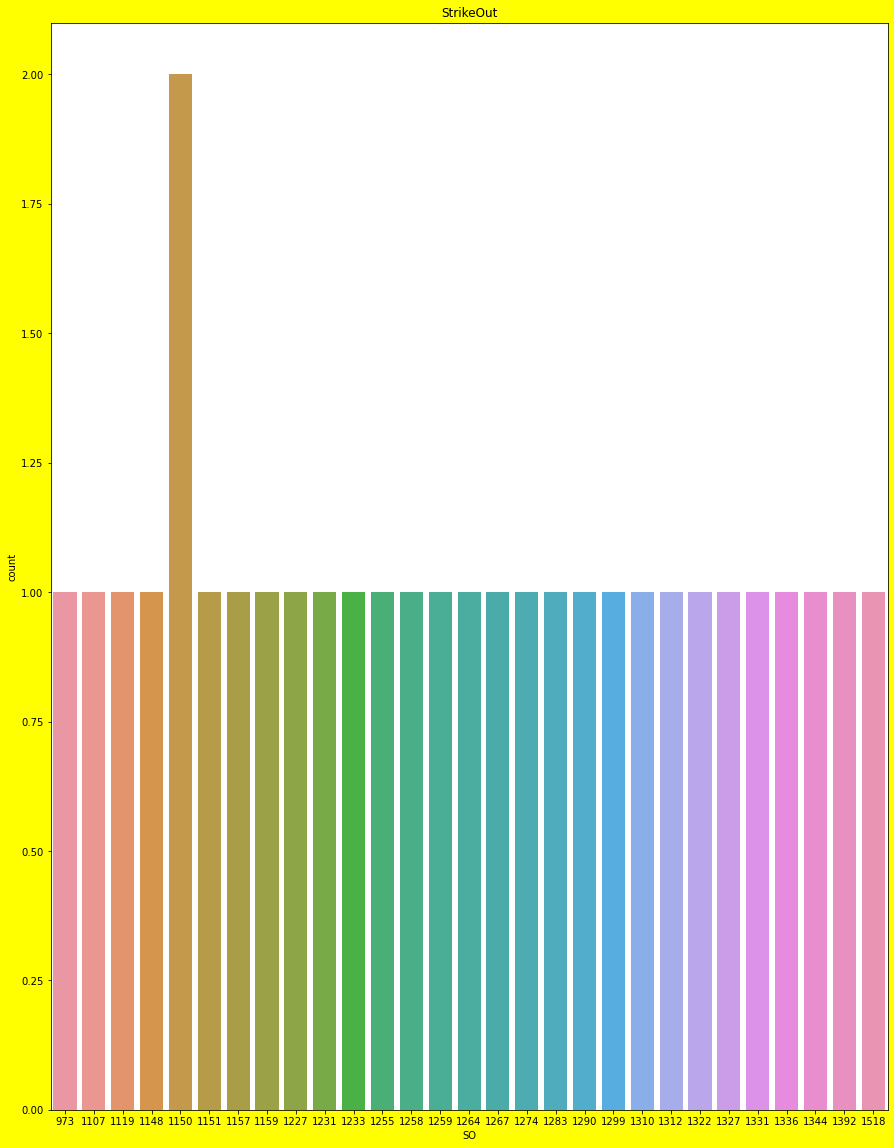

In [89]:
print(df['SO'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['SO'])
plt.title('StrikeOut')
plt.show()

In [90]:
# Observations: 
# 1150 batter strike out three, two times as per this graph.

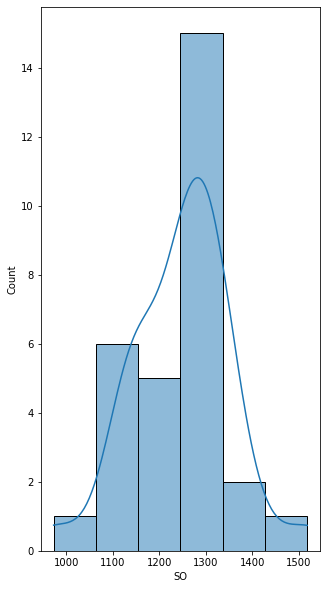

In [91]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['SO'],element='bars',kde="True")
plt.show()

In [92]:
# Observations:
# The Data in the column follows normal distribution when it ranges from (1100 t0 1400)
# skewness present in both sides 

69     3
88     2
78     1
82     1
132    1
93     1
59     1
112    1
57     1
51     1
134    1
84     1
95     1
98     1
104    1
70     1
52     1
121    1
101    1
71     1
87     1
44     1
63     1
83     1
68     1
86     1
97     1
Name: SB, dtype: int64


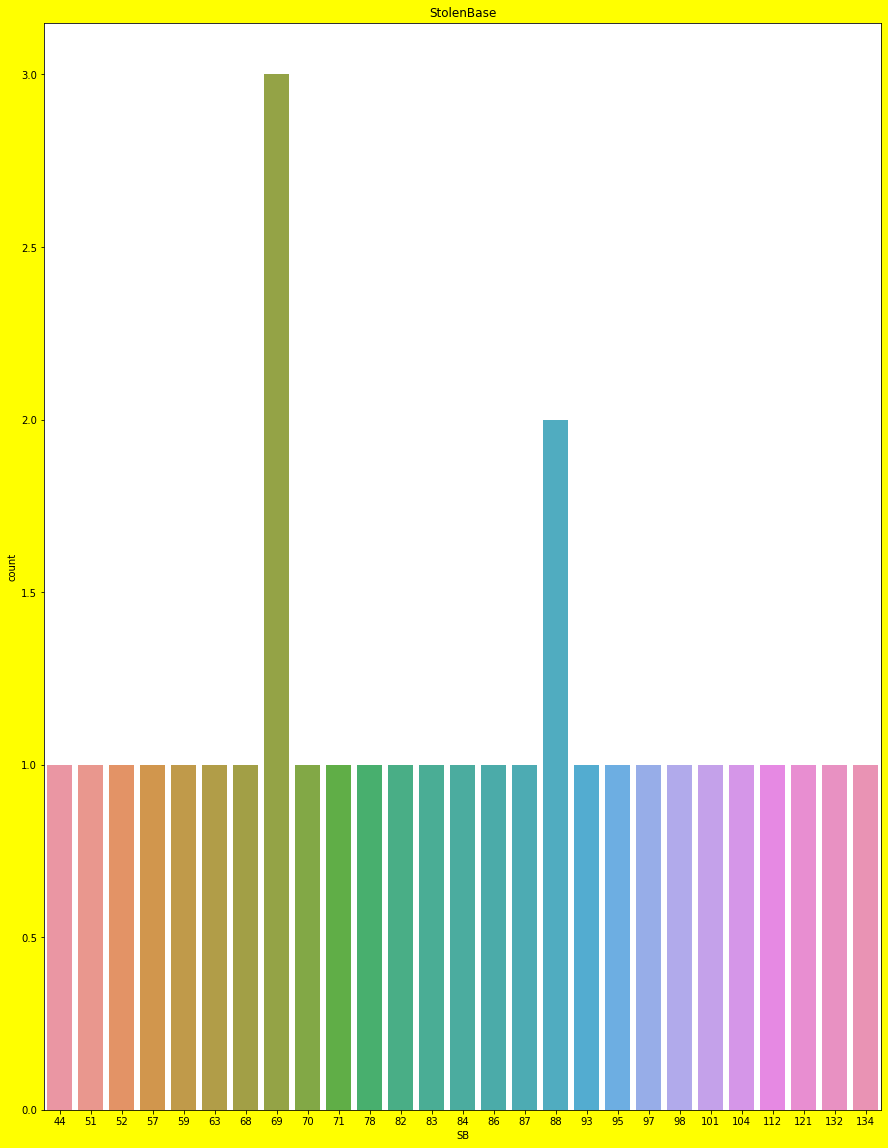

In [93]:
print(df['SB'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['SB'])
plt.title('StolenBase')
plt.show()

In [94]:
# Observations"
# It is observed three times @ 69 (number of bases advanced by the runner while the ball is in the possession of the defense.)
# It is observed two times @ 88 bases

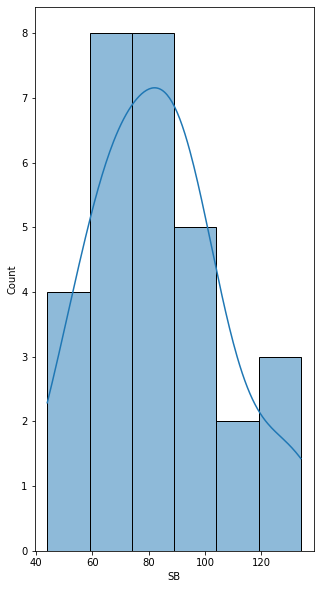

In [95]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['SB'],element='bars',kde="True")
plt.show()

In [96]:
# Observations:
# The Data in the SB column follows a normal distribution when the Bases is in the Range(45 to 120)
# The Data is skewed in the right when the Bases are range from 120 to 150 

641    1
700    1
731    1
713    1
627    1
595    1
809    1
760    1
678    1
635    1
613    1
754    1
737    1
608    1
596    1
525    1
729    1
726    1
675    1
618    1
733    1
753    1
642    1
693    1
698    1
670    1
803    1
701    1
640    1
844    1
Name: RA, dtype: int64


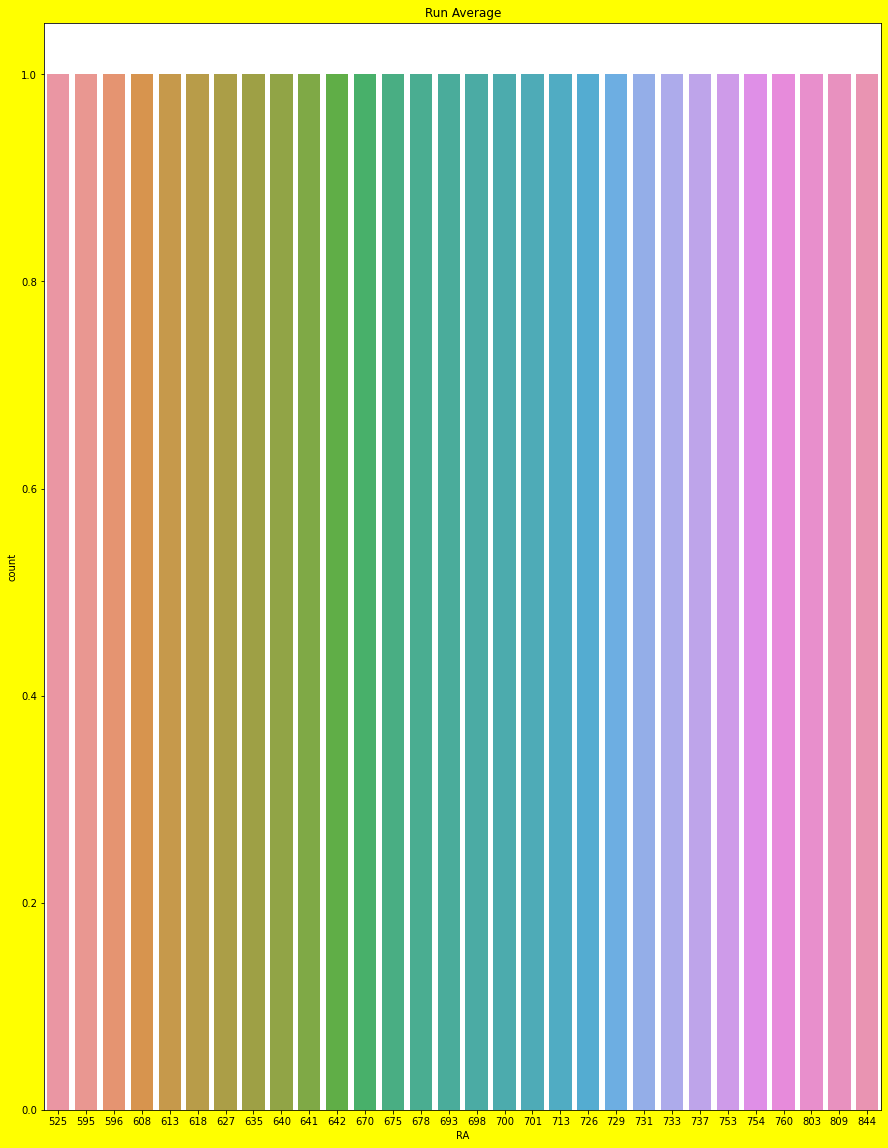

In [97]:
print(df['RA'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['RA'])
plt.title('Run Average')
plt.show()

In [98]:
# Observations:
# this shows different measure of rate,ranging from(525 to 844)runs throughout the dataset..

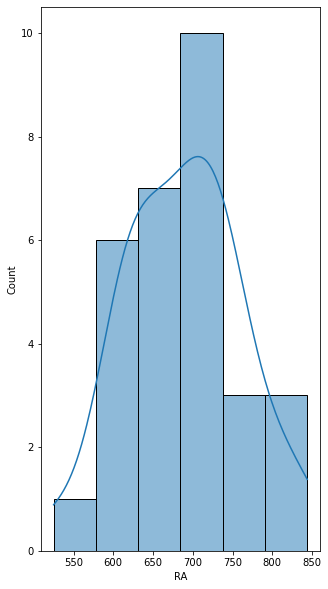

In [99]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['RA'],element='bars',kde="True")
plt.show()

In [100]:
# The Data in the column "Run Average " follows normal distribution

601    1
653    1
655    1
659    1
597    1
553    1
749    1
698    1
638    1
577    1
557    1
700    1
682    1
546    1
532    1
478    1
664    1
677    1
630    1
572    1
680    1
694    1
604    1
646    1
652    1
609    1
746    1
643    1
584    1
799    1
Name: ER, dtype: int64


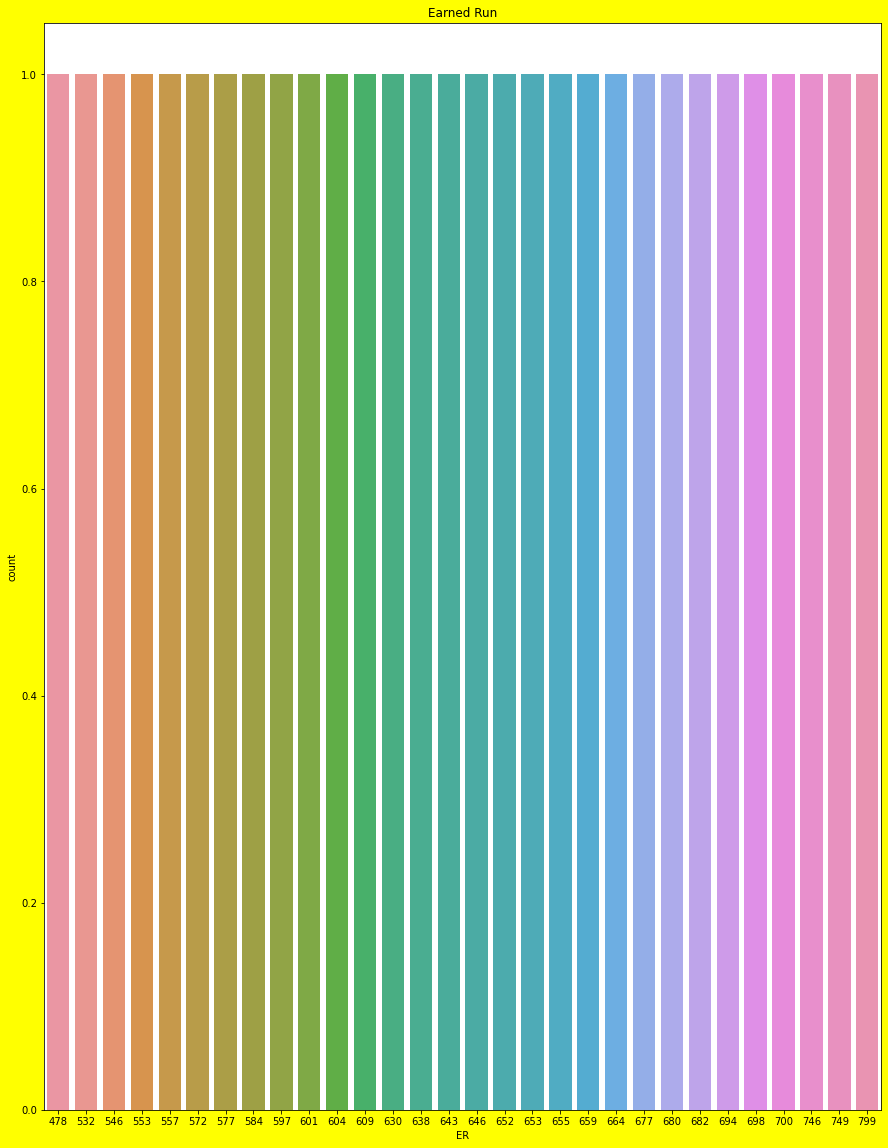

In [101]:
print(df['ER'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['ER'])
plt.title('Earned Run')
plt.show()

In [102]:
# Observations:
# The Earned run is different in all rows,ranges from(478 to 799 runs)(number of runs that did not occur as a result of errors or passed balls.)in the full dataset.

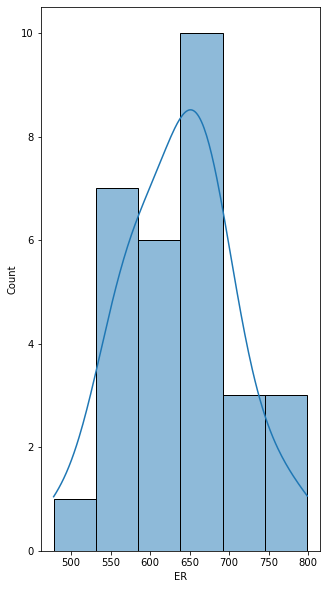

In [103]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['ER'],element='bars',kde="True")
plt.show()

In [104]:
# The values follow normal Distribution in the range(500 to 800)

3.73    1
4.07    1
4.09    1
4.04    1
3.72    1
3.44    1
4.69    1
4.41    1
4.02    1
3.62    1
3.43    1
4.33    1
4.28    1
3.36    1
3.21    1
2.94    1
4.14    1
4.16    1
3.94    1
3.57    1
4.24    1
4.31    1
3.74    1
4.05    1
4.03    1
3.80    1
4.64    1
3.98    1
3.67    1
5.04    1
Name: ERA, dtype: int64


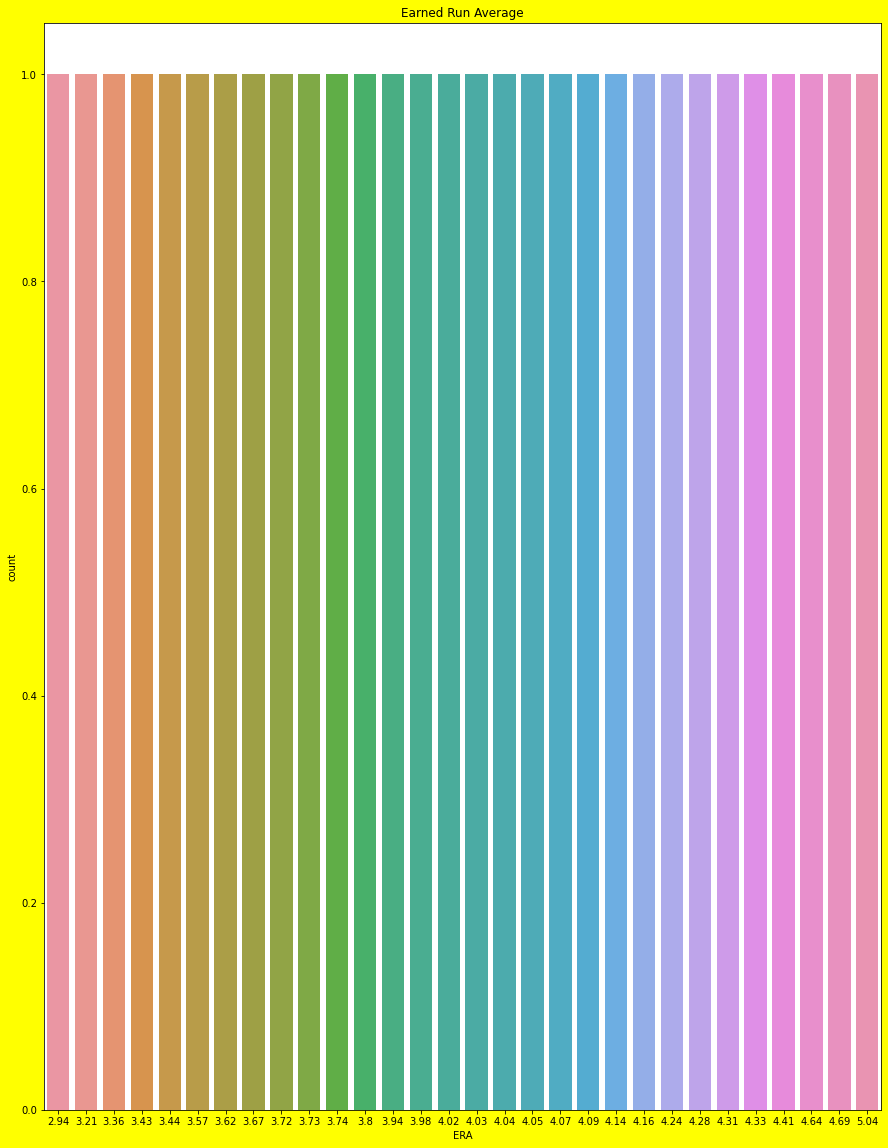

In [105]:
print(df['ERA'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['ERA'])
plt.title('Earned Run Average')
plt.show()

In [106]:
# Observations"
# The Earned Run Average occurs at different range from 2.94 to 5.04 through out the Dataset,

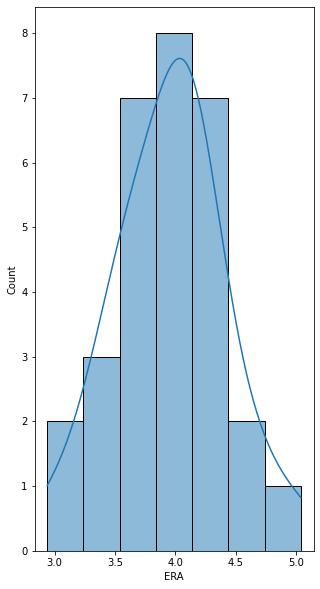

In [107]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['ERA'],element='bars',kde="True")
plt.show()

In [108]:
# Observations:
# The Earned runs average is unique in the whole data set and follows normal distribution from (3.0 to 5.0)

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64


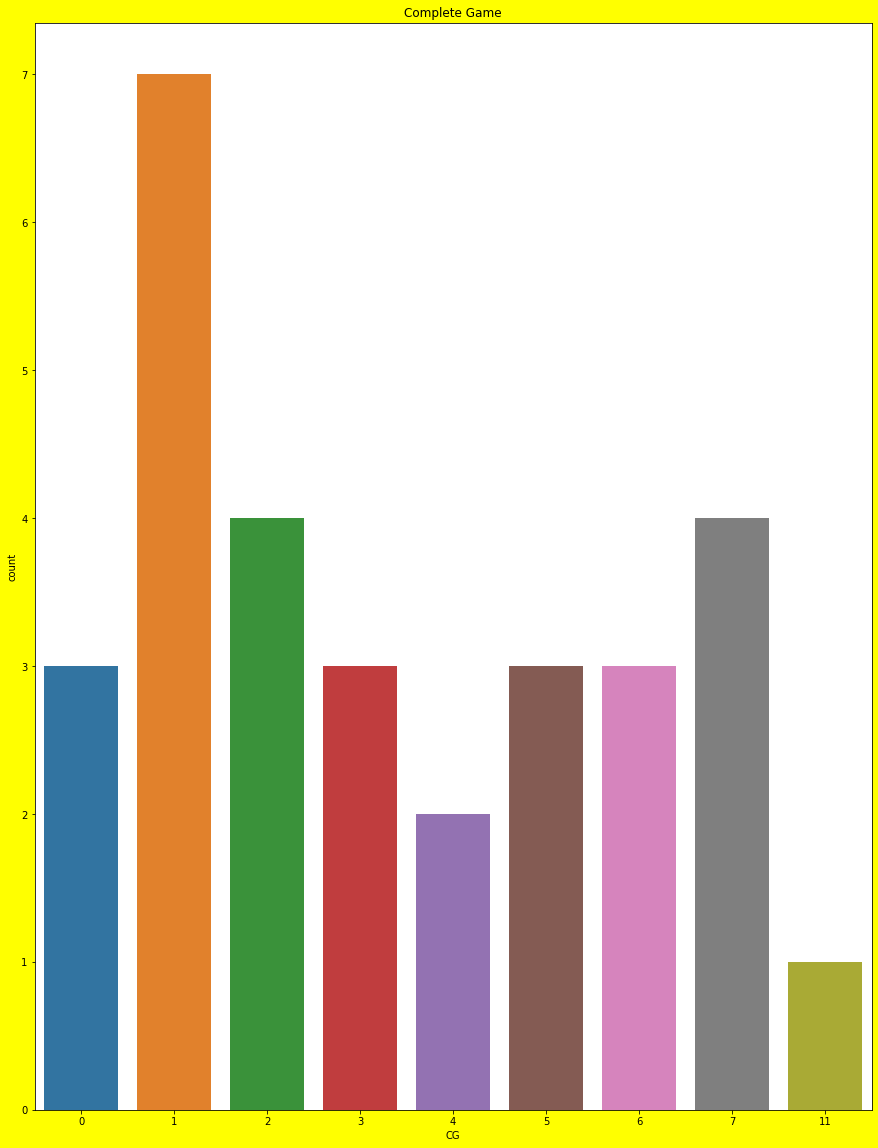

In [109]:
print(df['CG'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['CG'])
plt.title('Complete Game')
plt.show()

In [110]:
# Observations:
# 07 times it is observed that 01game, where player was the only pitcher for their team.
# 04 times it is observed that("02 Games and 07 games"),where  player was the only pitcher for their team.
# 03 times it is observed that ("03,05,06 games ")where player was the only pitcher for their team.
# 01 time it is observed that "11"games where player was the only pitcher for their team.



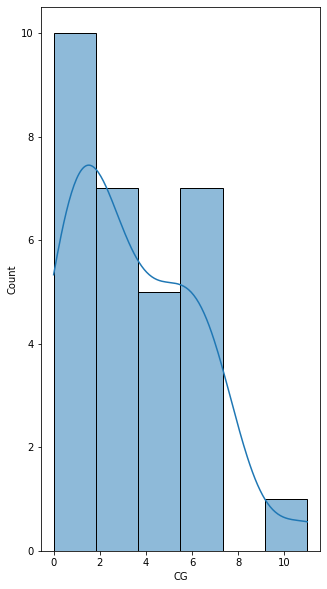

In [111]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['CG'],element='bars',kde="True")
plt.show()

In [112]:
# Observations:
# The Data in the column CG is normally distributed from 0 to 4 games followed by skewness.

12    7
10    5
13    3
8     2
9     2
4     2
15    2
21    2
7     2
14    1
18    1
6     1
Name: SHO, dtype: int64


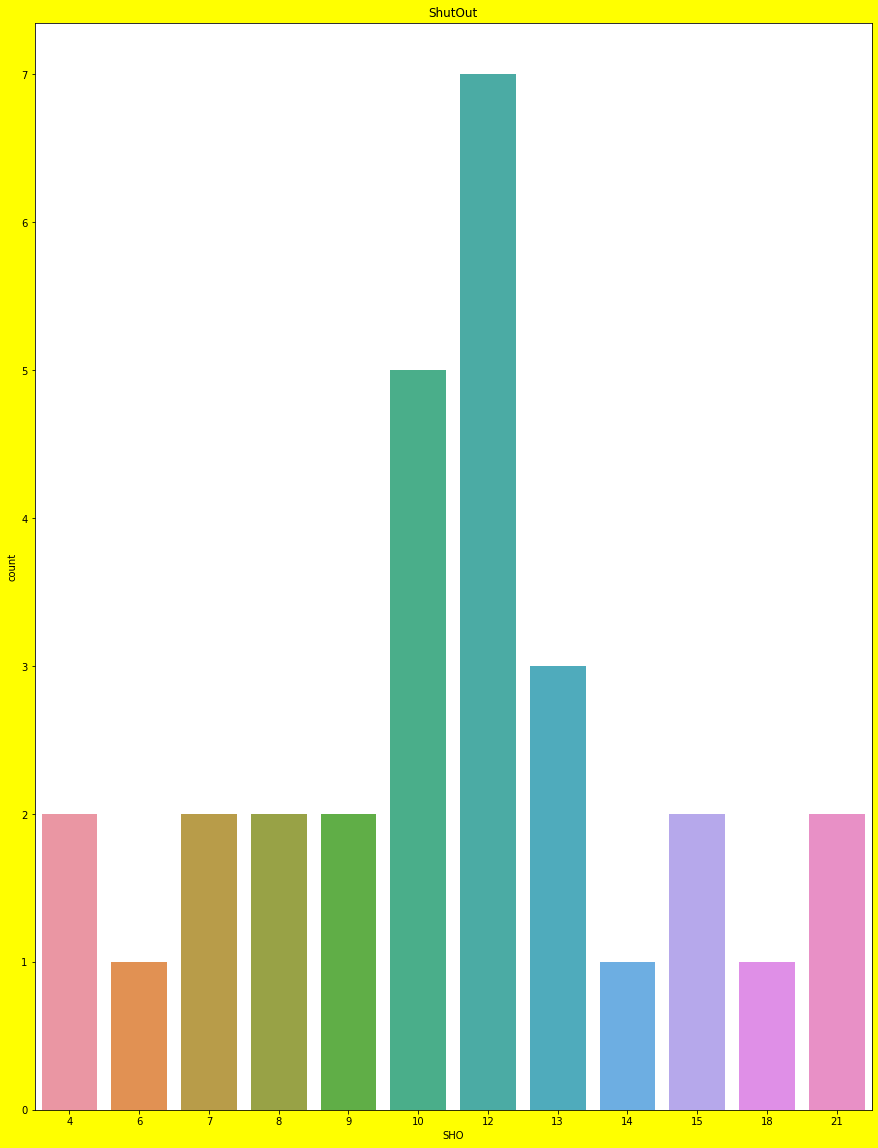

In [113]:
print(df['SHO'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['SHO'])
plt.title('ShutOut')
plt.show()

In [114]:
# Observations:
# It is observed 7 times that there is "12" games  shutout happened where pitcher pitched with No runs allowed.
# It is observed 5 times that there is "10" games  shutout happened,where pitcher pitched with No runs allowed
# It is observed that 3 times ,there is "13" games shutout happened .


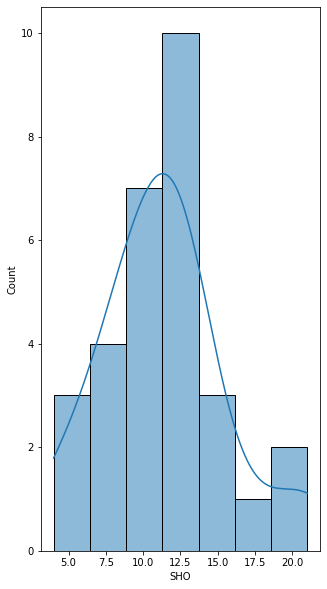

In [115]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['SHO'],element='bars',kde="True")
plt.show()

In [116]:
# Observations:
# The Data follows normal Distribution, where the No of Games is from(5 to 15)
# The Data has right skewness from(16 to 20)


35    4
41    3
45    3
44    2
48    2
40    2
56    1
28    1
47    1
50    1
54    1
62    1
39    1
46    1
60    1
43    1
34    1
37    1
38    1
36    1
Name: SV, dtype: int64


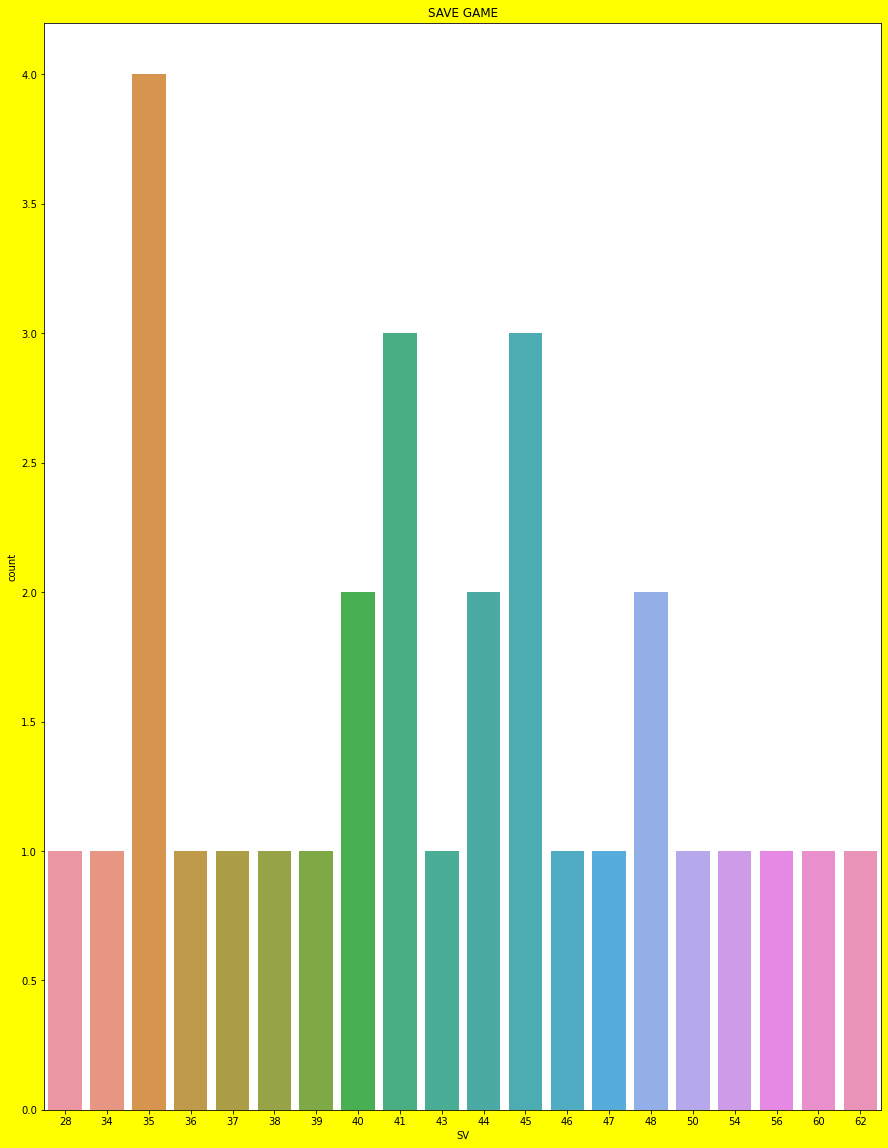

In [117]:
print(df['SV'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['SV'])
plt.title('SAVE GAME')
plt.show()

In [118]:
# Observations:
# It is observed 4 times where the pitcher wins the Game by saving it(number of Games=35)
# It is observed 3 times where the Pitcher wins the Game by saving it(number of Games=41)
# It is observed that 3 times again the pitcher save the Game (no of Games =45)
# It is observed 2 times where the pitcher saves @(44,48,40 games)
# I is observed where the pitcher saves a single game(@ 28,24,36,37,38,39,43,46,47,50,54,56,60,62)

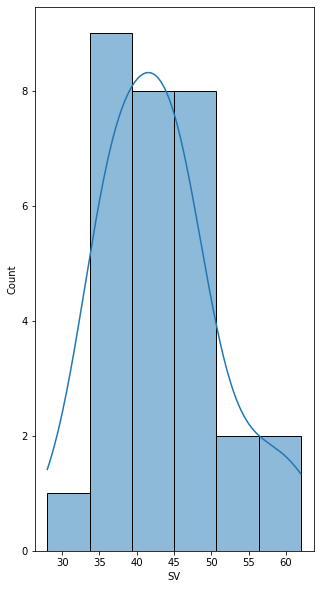

In [119]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['SV'],element='bars',kde="True")
plt.show()

In [120]:
# Observations:
# The Data in the column follows normal distribution where the Game ranges from (30 to 55)
# The Data has little skewness from range(55 to 66)


88     3
90     3
86     3
93     2
77     2
95     2
122    1
78     1
75     1
117    1
116    1
111    1
94     1
96     1
126    1
85     1
119    1
97     1
101    1
79     1
92     1
Name: E, dtype: int64


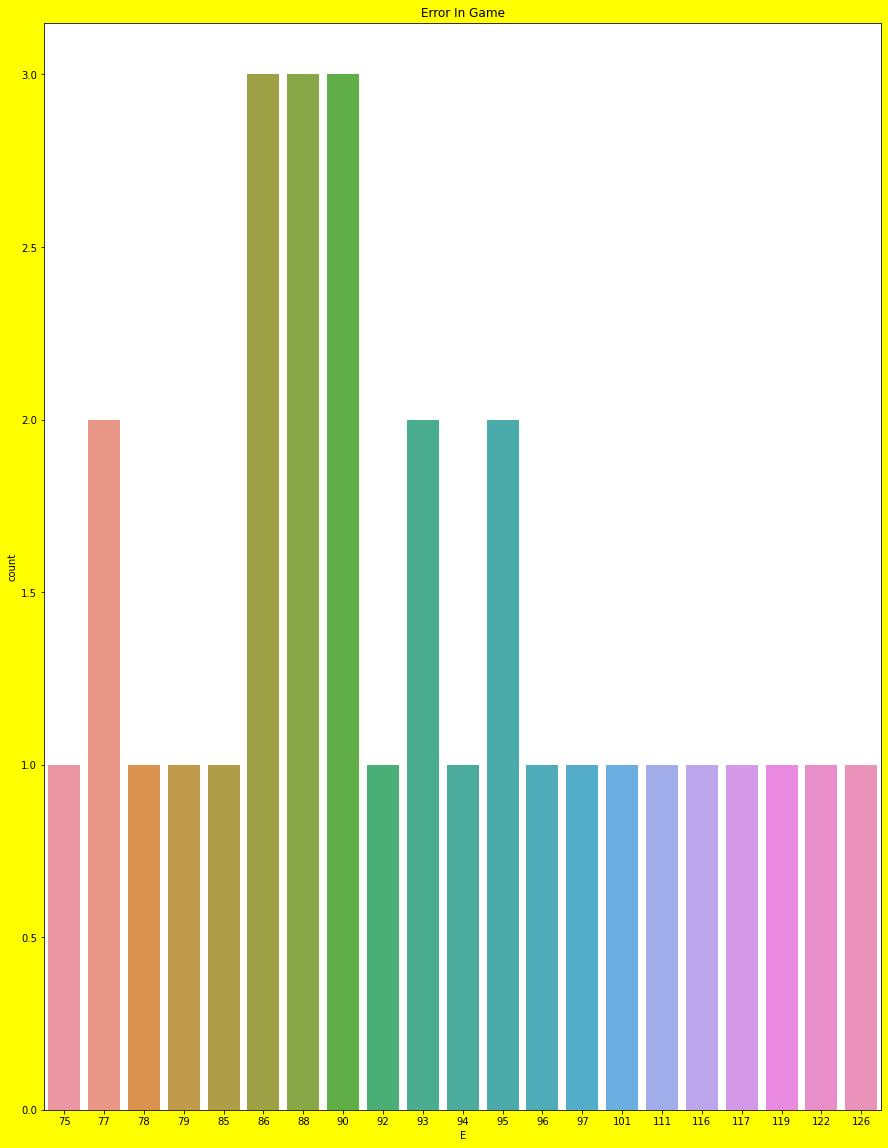

In [121]:
print(df['E'].value_counts())
plt.figure(figsize=(15,20),facecolor='yellow')
sns.countplot(x=df['E'])
plt.title('Error In Game')
plt.show()

In [122]:
# obsrvations:
# Error Generally refers to the error committed at the Game.
# 03 times it is observed where the errors happened @(86,88,90)games
# 02 times it is observed error where the games @('77','93'and '95'.)

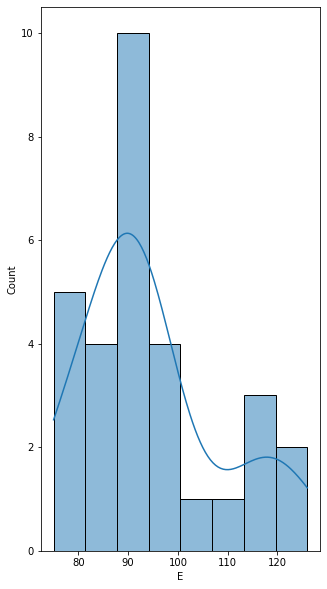

In [123]:
plt.figure(figsize=(5,10))
sns.histplot(x=df['E'],element='bars',kde="True")
plt.show()

In [124]:
# Observations:
# The data in the column {'E'} follows normal distribution where the Data is ranging from (65 to 100)
# the Data follows right skewness from [110 t0 130]

# Bivariate Analysis.

# Feature and Target Analysis.

In [125]:
# we will see the relationship between features and Target.

In [126]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [127]:
x=df.drop(columns='W',axis=1)
x
    


,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [128]:
y=df['W']
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

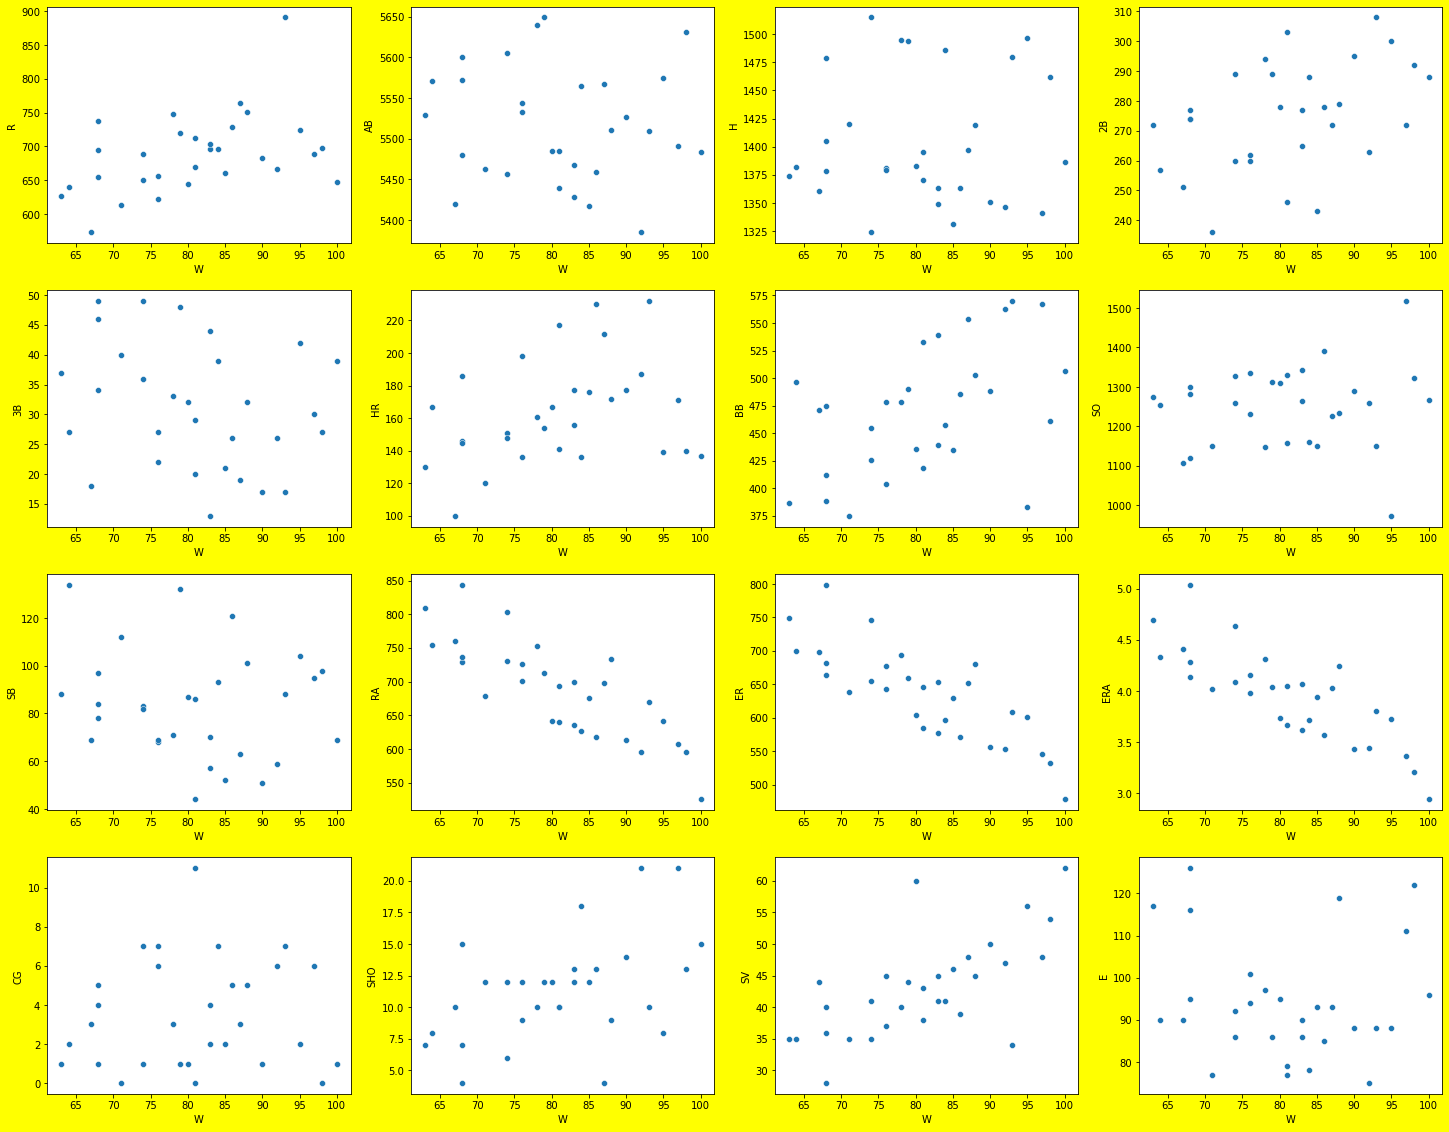

In [129]:
plt.figure(figsize=(25,20),facecolor='yellow')
plotnumber=1
for columns in x:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.scatterplot(y,x[columns])
    plotnumber+=1
plt.show()


In [130]:
#Observations:
# R: The Number of Wins is majority when the runs are between(600to 750),doesnt follow a trend of increasing like
# AB : Here the Win is scattered,No increase or decrease line is visible.
# Hit : Here the win is scattered,No increase or decrease trend line is visible.
# 2b: I can see increasing trend for winning whenthe batter reaches 2b 
# 3b: I Can see data is scattered for wins,No increase or decrease visible.
# HR : I can see increasing trend for winning ,when batter gets Home Run.
# BB :I can See increasing trend for Win when BB increases  
# SO: I can see increase trend for Win,when strikeout Increases.
# SB : I can see the data is scattered for win.
# RA : I can See Decreasing trend for win when the run rate decreases.
# ER : I can see Decreasing trend for Win,when the Earned run  decreases.
# ERA : I can see Decreasing trend for win ,when the Earned Run average decreases.
# CG : I can see the Data is scattered for win ,when complete game is done by pitcher.
# SHO: I can see the increasing trend in Data,for win,where pitcher is not allowing runs at all.
# SV : I can see the increasing trend in the Data ,where the game is saved by the Pitcher.
# E : I can see the Data is scattered for win,when there is Error in the Game.

# Checking the correlation of features with Target.

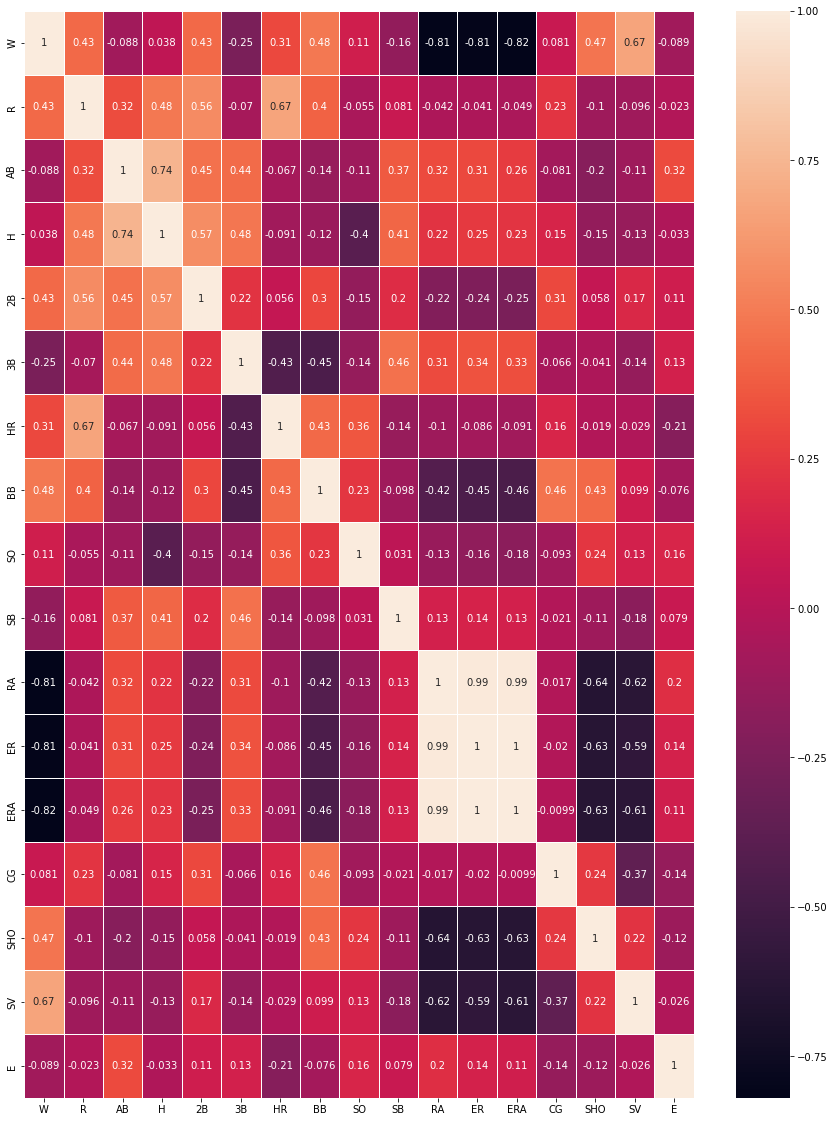

In [132]:
corr=df.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [133]:
corr['W'].sort_values(ascending=False)


W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

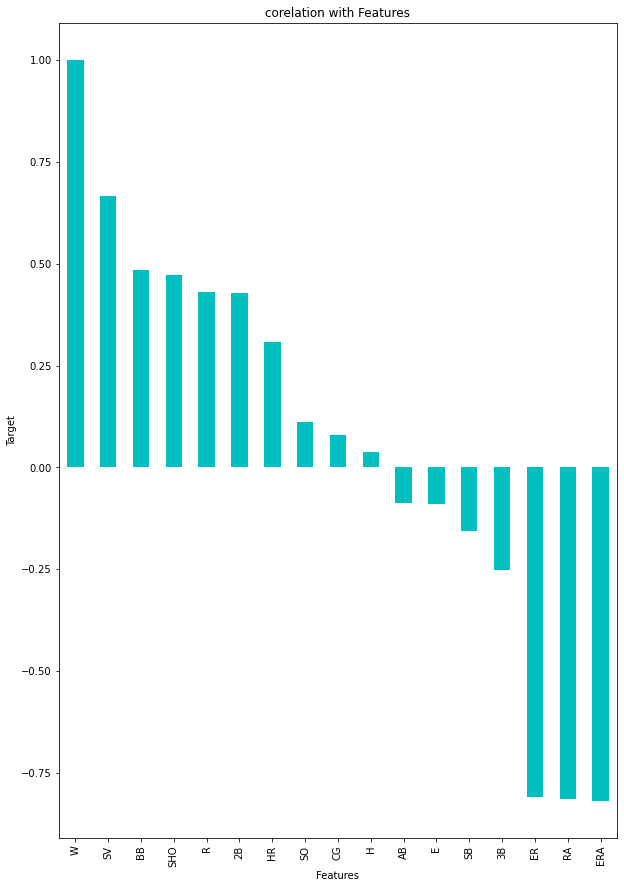

In [134]:
plt.figure(figsize=(10,15))
corr['W'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('corelation with Features')
plt.show()

In [135]:
# Observations:
# The Colums SV,ER,RA,ERA are having strong bond with Target
# The columns BB,SHO,R,2B,3B are having medium Bond with Target.
# The columns with less bond with Targets are SO,CG,H,AB,E,SB  with the Target Column.
# I can see a lot of Multi collinearity between features(H and AB)=0.74
# I can see multicollinearity between features(H and 2B)=0.57
# I can see Multicollineaity between features(HR and BB)=0.43
# I can see Multicollinearity between features(2B and 3B)=0.22
# I can see multicollinearity  between features (ER and RA)=0.99
# I can see multicollinearity  between features (ERA and RA)=0.99


Checking the Corelation using relplot

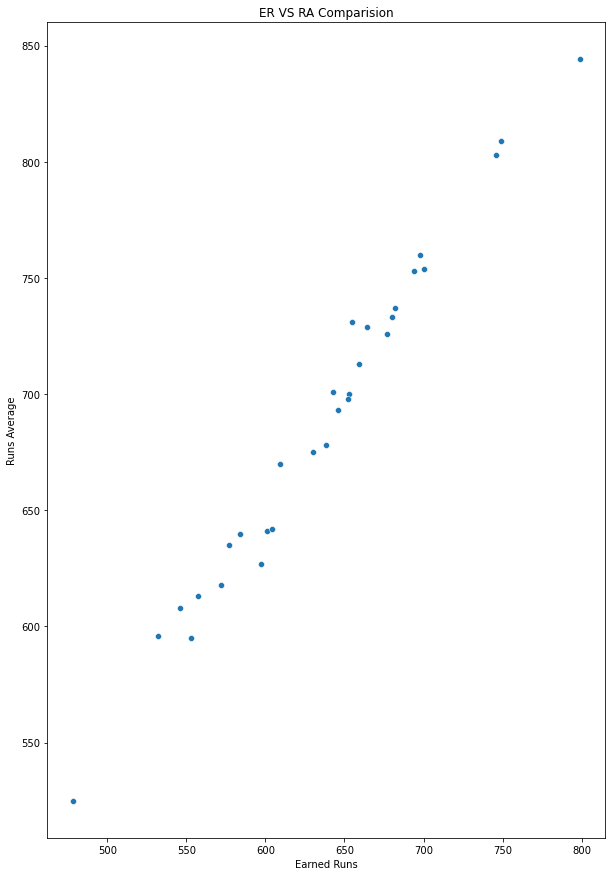

In [136]:
plt.figure(figsize=(10,15))
sns.scatterplot(x=df['ER'],y=df['RA'])
plt.xlabel('Earned Runs')
plt.ylabel('Runs Average')
plt.title('ER VS RA Comparision')
plt.show()

In [138]:
# Observations:
# we see Increasing Trend whern Earned runs increases,Runs average also increases.
# Let us see how much bond it gives to the Target
#ER    -0.809435
#RA    -0.812952
# Both columns are having strong Bond with the Target ,Hence cannot be removed,will analyze further with VIF(After preprocessing)


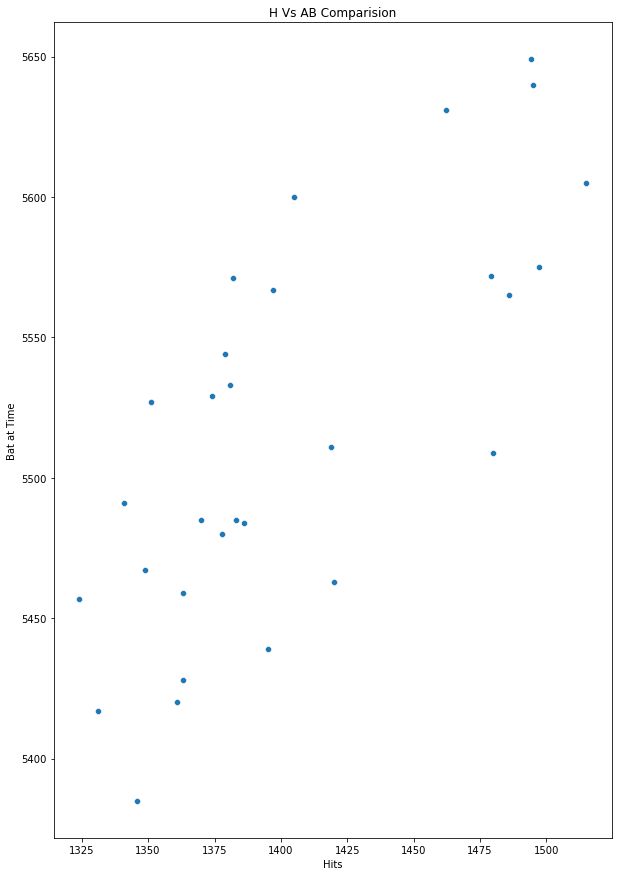

In [139]:
plt.figure(figsize=(10,15))
sns.scatterplot(x=df['H'],y=df['AB'])
plt.xlabel('Hits')
plt.ylabel('Bat at Time')
plt.title('H Vs AB Comparision')
plt.show()

In [142]:
# Observations:
# I dont see much relationship between both columns.
# H      0.037612  (These are the Values they are contributing to the Target.)
# AB    -0.08794

# Decided to drop H=Hit column where it gives minimum contribution to the Target.



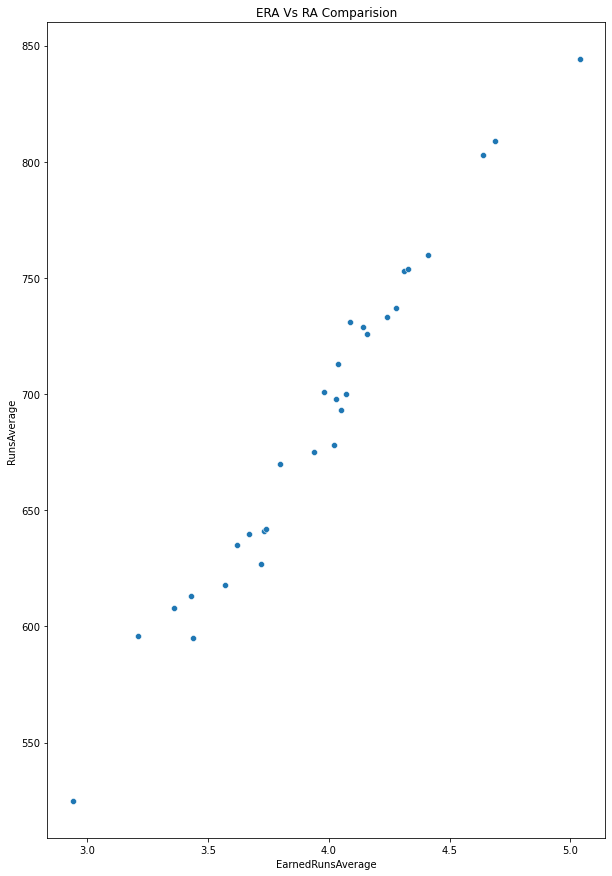

In [143]:
plt.figure(figsize=(10,15))
sns.scatterplot(x=df['ERA'],y=df['RA'])
plt.xlabel('EarnedRunsAverage')
plt.ylabel('RunsAverage')
plt.title('ERA Vs RA Comparision')
plt.show()

In [144]:
#Observations:
# I can see increasing trend in the Earned Runs average and Run Average.
#RA    -0.812952
#ERA   -0.819600   (These are the values they are contributing towards Target,Hence we cannot remove any of the columns.)

In [145]:
delete=pd.DataFrame([['H','0.037612']],columns=[['ColumnName','Corelation with Target']])
delete

,ColumnName,Corelation with Target
0,H,0.037612


In [146]:
df=df.drop(columns='H',axis=1) # Dropping the column from the Dataset.
df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Skewness check

In [147]:
# To See the Skewness check.
df.skew()

W      0.047089
R      1.200786
AB     0.183437
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [148]:
# Observations:
# We can see the Dataset is not much skewed ,as our typical range is from -0.5 to 0.5 
# Hence Im not applying any transformation methods.

# Checking Outliers.

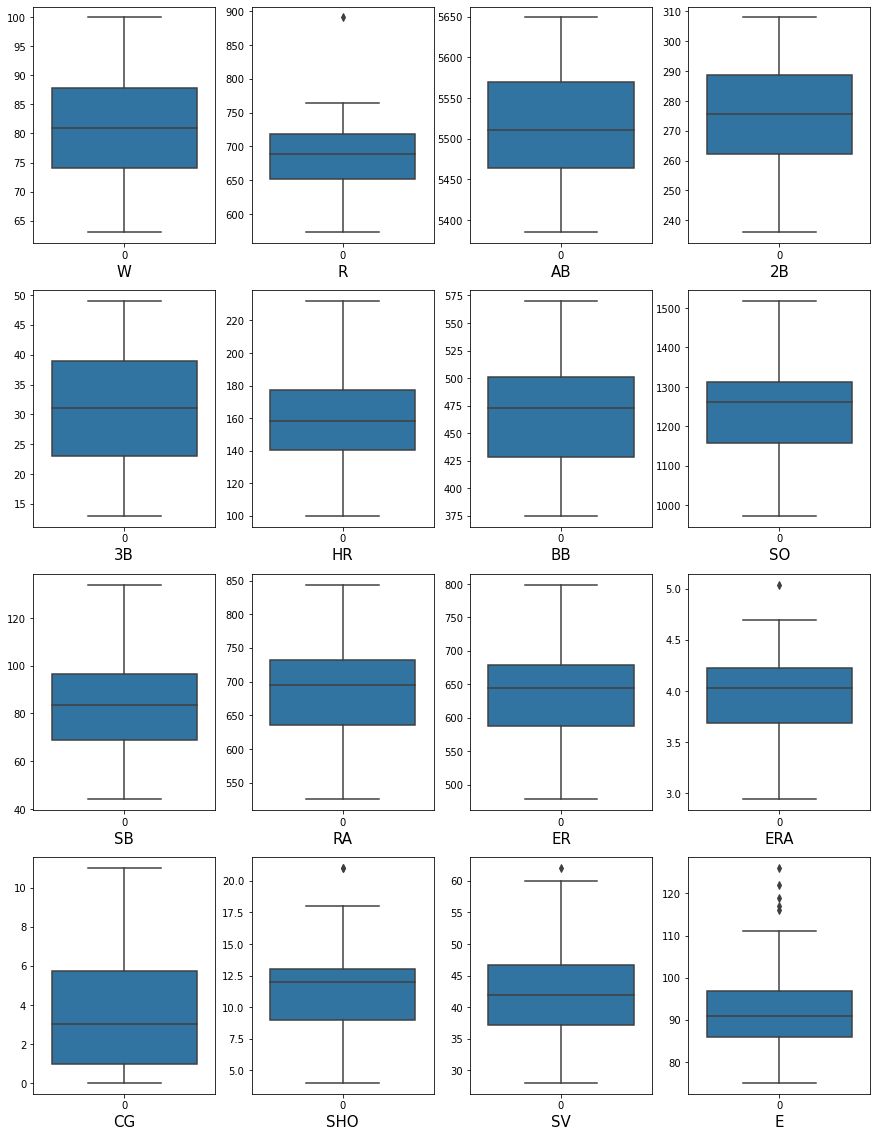

In [149]:
plt.figure(figsize=(15,20))
plotnumber=1
for columns in df:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()
    
    

In [150]:
# Observations:
# Columns 'R','ERA','SHO','SV' and 'E' are having outliers,will remove the same using zscore method.


In [151]:
from scipy.stats import zscore      # Importing Z Score .

In [152]:
z=np.abs(zscore(df))
z

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [153]:
# will see where z>3.
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [154]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


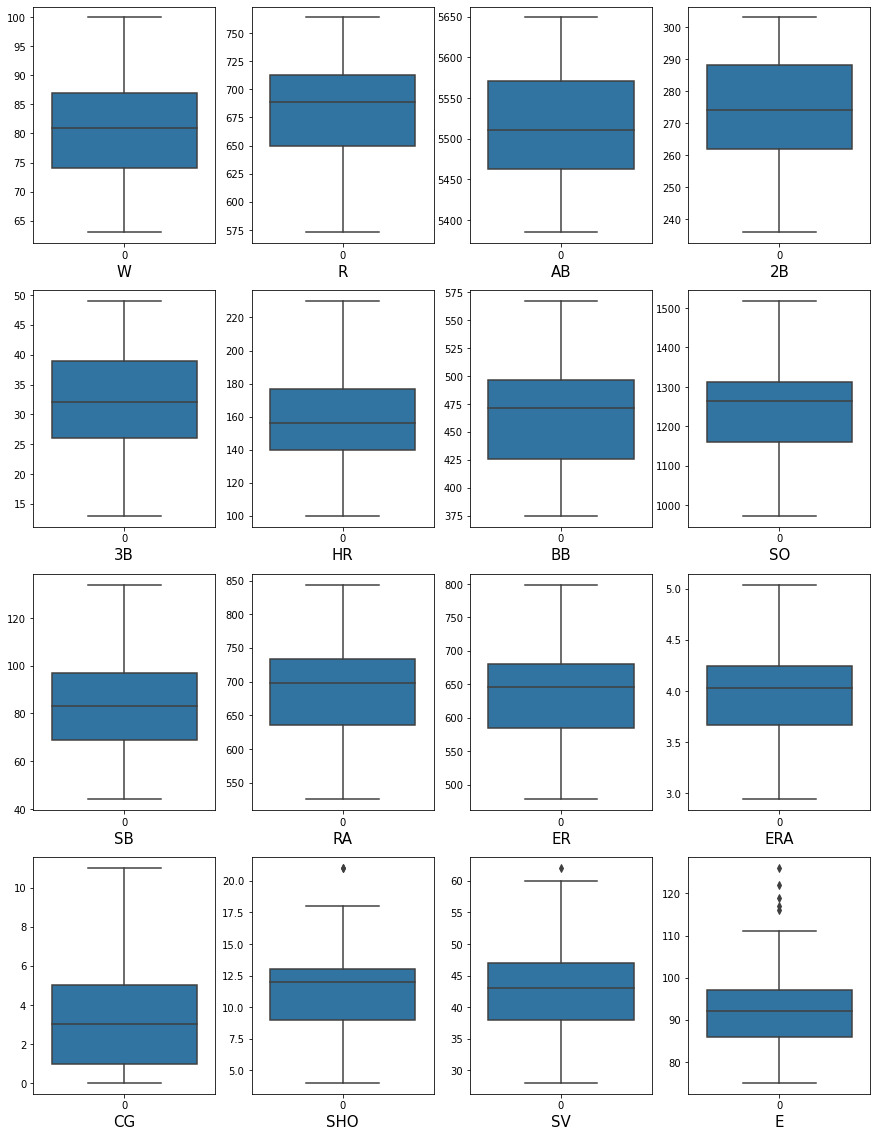

In [155]:
# Rechecking the outliers(after zscore method) by using BoxPlot.

plt.figure(figsize=(15,20))
plotnumber=1
for columns in df_new:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df_new[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()

In [156]:
print("OldDataframerows =",df.shape[0])
print("NewDataFramerows =",df_new.shape[0])
print("Dataloss=",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

OldDataframerows = 30
NewDataFramerows = 29
Dataloss= 3.3333333333333335


# Preprocessing.

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
x=df_new.drop(columns='W',axis=1)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [159]:
y=df_new['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [160]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.95939835,  0.83008422,  1.55653766,  1.01084549, -0.76586314,
        -1.53635899, -2.72762331,  0.9059529 , -0.66451353, -0.51114812,
        -0.51138828, -0.50148589, -0.81326172,  1.64315663, -0.47109143],
       [ 0.33114717, -0.70283074,  0.20117132,  1.20891656, -0.18138864,
        -0.49502051,  0.12189552, -0.58531515,  0.15463823,  0.23216082,
         0.23895226, -0.50148589,  0.15929869,  0.21100645, -0.61489829],
       [-0.27466646, -1.10025314,  1.73332457, -0.2766165 , -0.69710144,
         1.25294051, -0.9258657 ,  0.11645805, -0.67839746, -0.75415297,
        -0.64380131,  2.85461197, -0.32698152, -0.70036184, -1.1182223 ],
       [-1.32923093,  0.23395062, -0.8006212 , -0.47468758, -0.8690057 ,
        -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,  0.08921679,
         0.04033271,  1.36301292, -0.57012162, -0.83055731,  0.46365315],
       [ 0.17408438,  1.25589393,  0.90831897,  1.70409425, -0.35329291,
        -0.19749523,  0.07293472, -0.01512442, 

# Checking Multicollinearity using VIF

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [162]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,5.763757,R
1,9.753803,AB
2,3.704493,2B
3,3.228604,3B
4,6.729974,HR
5,3.255173,BB
6,2.709605,SO
7,1.872466,SB
8,193.821209,RA
9,1678.053167,ER


In [163]:
# Observations:
# VIF  values > 10 to be removed from the Dataset.
# Since 03 columns are having greater than 10 ,trying to remove the highest value ,so decided to remove 'ER'

In [164]:
df_new

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [165]:
x=df_new.drop(columns='ER',axis=1)
x

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,4.64,7,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,4.31,3,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,4.24,5,9,45,119


In [166]:
# Applying standard scaler after removing the 'ER' column from x(features)
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.41602548,  0.95939835,  0.83008422,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51138828, -0.50148589, -0.81326172,  1.64315663, -0.47109143],
       [ 0.23994704,  0.33114717, -0.70283074,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23895226, -0.50148589,  0.15929869,  0.21100645, -0.61489829],
       [ 0.04393396, -0.27466646, -1.10025314,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.64380131,  2.85461197, -0.32698152, -0.70036184, -1.1182223 ],
       [-0.44609872, -1.32923093,  0.23395062, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.04033271,  1.36301292, -0.57012162, -0.83055731,  0.46365315],
       [-0.64211179,  0.17408438,  1.25589393,  0.90831897,  1.70409425,
        -0.35329291, -0.19749523,  0.07293472, 

In [168]:
# Rechecking VIF after removing the column.
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,20.102379,W
1,12.810322,R
2,3.633125,AB
3,4.181410,2B
4,3.200324,3B
5,5.633358,HR
6,3.833905,BB
7,2.697078,SO
8,1.766643,SB
9,149.318211,RA


In [169]:
# Observations:
# after removing the column ER,still having VIF (02 Values ) greater than  in almost 3 three columns.
# Hence Trying The Best Features by using K Best selection and PCA.

# K Best feature selection Method:

In [170]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [171]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,inf,W
1,2.485509,R
2,1.622586,AB
3,0.799063,2B
4,0.811129,3B
5,0.818974,HR
6,0.943327,BB
7,1.519889,SO
8,3.283197,SB
9,2.524616,RA


In [172]:
best_score.sort_values('score',ascending=False)

,score,columnname
0,inf,W
8,3.283197,SB
13,2.941436,SV
9,2.524616,RA
14,2.492758,E
1,2.485509,R
10,1.732208,ERA
2,1.622586,AB
7,1.519889,SO
12,1.253358,SHO


In [173]:
# after Seeing the KBest Features,decided to drop  'CG', column from the Dataset 


In [174]:
x.drop(columns='CG',axis=1,inplace=True)

In [175]:
x

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,4.24,9,45,119


In [176]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.41602548,  0.95939835,  0.83008422,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51138828, -0.81326172,  1.64315663, -0.47109143],
       [ 0.23994704,  0.33114717, -0.70283074,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23895226,  0.15929869,  0.21100645, -0.61489829],
       [ 0.04393396, -0.27466646, -1.10025314,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.64380131, -0.32698152, -0.70036184, -1.1182223 ],
       [-0.44609872, -1.32923093,  0.23395062, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.04033271, -0.57012162, -0.83055731,  0.46365315],
       [-0.64211179,  0.17408438,  1.25589393,  0.90831897,  1.70409425,
        -0.35329291, -0.19749523,  0.07293472, -0.01512442,  1.58468284,
         1.4968761 ,  0.15

In [177]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# PrincipalComponent Analysis(PCA)

In [178]:
from sklearn.decomposition import PCA

In [179]:
pca=PCA()
pca.fit_transform(x_scaled)


array([[-2.15375802e-01, -2.67010416e+00, -2.32167496e+00,
        -2.83350081e+00, -2.82834450e-01, -9.32645168e-01,
         4.13837226e-01,  7.39131134e-01,  3.09764159e-01,
        -8.20885126e-02,  3.50897734e-01, -1.97859828e-01,
        -1.51651274e-01,  5.59176371e-02],
       [ 8.34863888e-02, -7.22240662e-02, -3.32695661e-01,
        -4.82150052e-01, -5.88225022e-01, -2.85442732e-01,
        -1.23902927e+00, -6.43919394e-01,  7.16122613e-01,
        -1.54705467e-01, -2.07887305e-01, -8.99244739e-02,
         7.30636912e-02,  3.87693180e-02],
       [-8.60070254e-01, -1.17160837e-02, -8.98688291e-01,
        -5.92717512e-01, -1.06807162e+00,  1.39078655e+00,
         1.36003280e+00, -1.04526470e+00,  9.75475603e-01,
         1.04575268e+00, -8.26540265e-02,  1.29943874e-01,
        -1.80535747e-01, -2.00392581e-02],
       [ 1.30254903e+00,  1.32439963e+00, -8.83890521e-01,
         4.67180994e-02,  9.47447951e-01, -5.19493427e-03,
        -1.58506319e-01,  3.94619726e-01, -6.

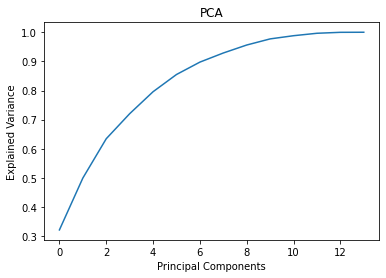

In [180]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.xticks()
plt.title('PCA')
plt.show()
         

In [181]:
# Observations:
# As per Scree plot,I feel (n_components=9) to get the full data Variance.

In [182]:
pca=PCA(n_components=9)
new_pca=pca.fit_transform(x_scaled)
new_pca

array([[-2.15375802e-01, -2.67010416e+00, -2.32167496e+00,
        -2.83350081e+00, -2.82834450e-01, -9.32645168e-01,
         4.13837226e-01,  7.39131134e-01,  3.09764159e-01],
       [ 8.34863888e-02, -7.22240662e-02, -3.32695661e-01,
        -4.82150052e-01, -5.88225022e-01, -2.85442732e-01,
        -1.23902927e+00, -6.43919394e-01,  7.16122613e-01],
       [-8.60070254e-01, -1.17160837e-02, -8.98688291e-01,
        -5.92717512e-01, -1.06807162e+00,  1.39078655e+00,
         1.36003280e+00, -1.04526470e+00,  9.75475603e-01],
       [ 1.30254903e+00,  1.32439963e+00, -8.83890521e-01,
         4.67180994e-02,  9.47447951e-01, -5.19493427e-03,
        -1.58506319e-01,  3.94619726e-01, -6.80793961e-01],
       [ 2.40967646e+00, -1.37696194e+00,  2.17077764e-01,
         1.83802643e-01, -9.99537865e-01,  8.35829457e-01,
        -1.04286964e+00, -1.09805954e+00, -4.44642479e-01],
       [-9.48075546e-01, -5.72204970e-01,  2.87530929e+00,
        -1.90609467e+00,  7.22892668e-01,  3.777419

In [183]:
comp=pd.DataFrame(new_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-0.215376,-2.670104,-2.321675,-2.833501,-0.282834,-0.932645,0.413837,0.739131,0.309764
1,0.083486,-0.072224,-0.332696,-0.482150,-0.588225,-0.285443,-1.239029,-0.643919,0.716123
2,-0.860070,-0.011716,-0.898688,-0.592718,-1.068072,1.390787,1.360033,-1.045265,0.975476
3,1.302549,1.324400,-0.883891,0.046718,0.947448,-0.005195,-0.158506,0.394620,-0.680794
4,2.409676,-1.376962,0.217078,0.183803,-0.999538,0.835829,-1.042870,-1.098060,-0.444642
5,-0.948076,-0.572205,2.875309,-1.906095,0.722893,0.377742,1.136367,0.127190,-0.046579
6,-0.487701,2.034372,2.301118,-1.345039,-0.288529,-0.844870,-1.169477,0.428674,-0.709153
7,-1.172442,0.211917,-0.846562,-0.001395,0.569154,-1.618715,-0.038909,-0.791943,-0.222313
8,1.141269,-1.960496,0.806761,-1.222051,0.260336,1.453412,-0.095014,-0.016582,-0.586605
9,0.184115,-1.531522,1.167105,0.069798,1.086714,0.115310,0.560668,0.654957,1.414966


In [184]:
x=comp
x

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-0.215376,-2.670104,-2.321675,-2.833501,-0.282834,-0.932645,0.413837,0.739131,0.309764
1,0.083486,-0.072224,-0.332696,-0.482150,-0.588225,-0.285443,-1.239029,-0.643919,0.716123
2,-0.860070,-0.011716,-0.898688,-0.592718,-1.068072,1.390787,1.360033,-1.045265,0.975476
3,1.302549,1.324400,-0.883891,0.046718,0.947448,-0.005195,-0.158506,0.394620,-0.680794
4,2.409676,-1.376962,0.217078,0.183803,-0.999538,0.835829,-1.042870,-1.098060,-0.444642
5,-0.948076,-0.572205,2.875309,-1.906095,0.722893,0.377742,1.136367,0.127190,-0.046579
6,-0.487701,2.034372,2.301118,-1.345039,-0.288529,-0.844870,-1.169477,0.428674,-0.709153
7,-1.172442,0.211917,-0.846562,-0.001395,0.569154,-1.618715,-0.038909,-0.791943,-0.222313
8,1.141269,-1.960496,0.806761,-1.222051,0.260336,1.453412,-0.095014,-0.016582,-0.586605
9,0.184115,-1.531522,1.167105,0.069798,1.086714,0.115310,0.560668,0.654957,1.414966


# Model Building.

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [186]:
# Importing train_test_split.

In [187]:
from sklearn.model_selection import train_test_split

In [191]:
# To Choose Best RandomState:
lr=LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("The Model performs well")
        print("At Random State:",i)
        print("The Model Training score is:",r2_score(y_train,pred_train)*100)
        print("The Model Test score is :",r2_score(y_test,pred_test)*100)

The Model performs well
At Random State: 292
The Model Training score is: 93.70534786404647
The Model Test score is : 93.69117223417243
The Model performs well
At Random State: 633
The Model Training score is: 93.13089469095499
The Model Test score is : 93.0628936846316
The Model performs well
At Random State: 822
The Model Training score is: 93.81802416736029
The Model Test score is : 93.84619672129173


In [192]:
# Choosing Random state =822.as the training and testing score is almost equal.

In [193]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=822)
lr.fit(x_train,y_train)


LinearRegression()

In [194]:
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)*100

93.84619672129173

In [195]:
mae=mean_absolute_error(y_test,pred_test)
mae

1.7321889631182028

In [196]:
mse=mean_squared_error(y_test,pred_test)
mse

5.369193360672965

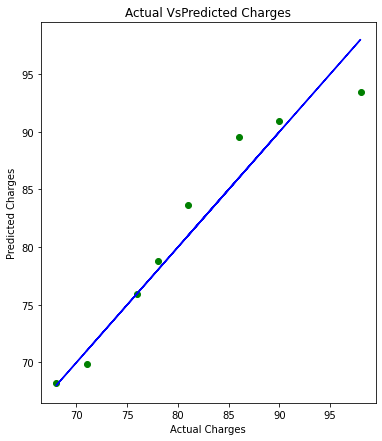

In [197]:
plt.figure(figsize=(6,7))
plt.scatter(x=y_test,y=pred_test,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual VsPredicted Charges')
plt.show()

# Cross Valid Score

In [198]:
from sklearn.model_selection import cross_val_score

In [199]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At Cross fold",j,"The CV Score is:",cv_mean*100,"The testing score:",r2_score(y_test,pred_test)*100 )
    print("The Difference between the crossvalidationscore and the modelscore is:",r2_score(y_test,pred_test)*100-cv_mean*100)
    print("\n")

At Cross fold 2 The CV Score is: 77.9947108915799 The testing score: 93.84619672129173
The Difference between the crossvalidationscore and the modelscore is: 15.851485829711834


At Cross fold 3 The CV Score is: 68.1219551032166 The testing score: 93.84619672129173
The Difference between the crossvalidationscore and the modelscore is: 25.724241618075126


At Cross fold 4 The CV Score is: 76.92762518106768 The testing score: 93.84619672129173
The Difference between the crossvalidationscore and the modelscore is: 16.91857154022405


At Cross fold 5 The CV Score is: 56.40103378559963 The testing score: 93.84619672129173
The Difference between the crossvalidationscore and the modelscore is: 37.4451629356921


At Cross fold 6 The CV Score is: 56.883761350816506 The testing score: 93.84619672129173
The Difference between the crossvalidationscore and the modelscore is: 36.96243537047523


At Cross fold 7 The CV Score is: 59.64677463413249 The testing score: 93.84619672129173
The Difference be

In [200]:
#Observations:
#Choosing CV=2 and try for different models.

In [201]:
# Trying the Model with Different Algorithms

In [257]:
# Defining a function for the results
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvscore=cross_val_score(algorithm,x,y,cv=2)
    cvm=cvscore.mean()
    print("The Model Name is :",algorithm)
    print("The Model Training score is:",r2_score(y_train,pred_algo_train)*100)
    print("The Model Test score is :",r2_score(y_test,pred_algo_test)*100)
    print("The Cross Validation score is:",cvm*100)
    print("The Difference between the crossvalidation and the testscore is:",cvm*100-r2_score(y_test,pred_algo_test)*100)
    print("The Mean squared error is :",mean_squared_error(y_test,pred_algo_test))
    print("The Mean absolute Error is :",mean_absolute_error(y_test,pred_algo_test))

In [222]:
# Training the Model with Decision Tree  Regressor
from sklearn.tree import DecisionTreeRegressor


In [260]:
dt=DecisionTreeRegressor()
model_selection(dt,x_train,x_test,y_train,y_test)




The Model Name is : DecisionTreeRegressor()
The Model Training score is: 100.0
The Model Test score is : -32.69461077844311
The Cross Validation score is: 13.192654447953867
The Difference between the crossvalidation and the testscore is: 45.88726522639698
The Mean squared error is : 69.25
The Mean absolute Error is : 7.5


In [261]:
from sklearn.neighbors import KNeighborsRegressor

In [262]:
knn=KNeighborsRegressor()

In [263]:
model_selection(knn,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor()
The Model Training score is: 78.44094368917334
The Model Test score is : 79.87065868263475
The Cross Validation score is: 45.74707461529864
The Difference between the crossvalidation and the testscore is: -34.12358406733612
The Mean squared error is : 10.504999999999988
The Mean absolute Error is : 2.424999999999999


In [264]:
# Training the Model with SVM Regressor

In [265]:
from sklearn.svm import SVR

In [266]:
svr=SVR()

In [267]:
model_selection(svr,x_train,x_test,y_train,y_test)

The Model Name is : SVR()
The Model Training score is: 23.80456064744878
The Model Test score is : 10.829200605693623
The Cross Validation score is: -12.30156245327142
The Difference between the crossvalidation and the testscore is: -23.130763058965044
The Mean squared error is : 46.53601093390364
The Mean absolute Error is : 6.0242522098810145


In [268]:
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor

In [269]:
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()

In [270]:
model_selection(sgd,x_train,x_test,y_train,y_test)
model_selection(lasso,x_train,x_test,y_train,y_test)
model_selection(ridge,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor()
The Model Training score is: 97.48328200725531
The Model Test score is : 60.537151012008884
The Cross Validation score is: 24.007914727703433
The Difference between the crossvalidation and the testscore is: -36.529236284305455
The Mean squared error is : 20.594674315607865
The Mean absolute Error is : 3.14984734844602
The Model Name is : Lasso()
The Model Training score is: 91.68077329688134
The Model Test score is : 78.16008063047006
The Cross Validation score is: 77.78298755276428
The Difference between the crossvalidation and the testscore is: -0.37709307770577993
The Mean squared error is : 11.397707920973433
The Mean absolute Error is : 3.0765760502034425
The Model Name is : Ridge()
The Model Training score is: 97.50960696545144
The Model Test score is : 57.733860704739534
The Cross Validation score is: 80.10022113000987
The Difference between the crossvalidation and the testscore is: 22.366360425270337
The Mean squared error is : 22.057641444714

In [271]:
# Training the Models with Ensemble methods 
from sklearn.ensemble import RandomForestRegressor              #randomforestRegressor
from sklearn.ensemble import AdaBoostRegressor                  #AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor          #GradientBoostRegressor
from xgboost import XGBRegressor                                # ExtraGradientBoostRegressor

In [272]:
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gbt=GradientBoostingRegressor()
xgb=XGBRegressor()

In [273]:
model_selection(rf,x_train,x_test,y_train,y_test)
model_selection(ada,x_train,x_test,y_train,y_test)
model_selection(gbt,x_train,x_test,y_train,y_test)
model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is : RandomForestRegressor()
The Model Training score is: 96.38474665808309
The Model Test score is : 53.51394011976047
The Cross Validation score is: 19.965109681906966
The Difference between the crossvalidation and the testscore is: -33.5488304378535
The Mean squared error is : 24.259912500000002
The Mean absolute Error is : 3.95125
The Model Name is : AdaBoostRegressor()
The Model Training score is: 99.56780960155065
The Model Test score is : 48.96706586826347
The Cross Validation score is: 36.23792737253087
The Difference between the crossvalidation and the testscore is: -12.729138495732599
The Mean squared error is : 26.6328125
The Mean absolute Error is : 4.40625
The Model Name is : GradientBoostingRegressor()
The Model Training score is: 99.99990336735198
The Model Test score is : 23.313303562237696
The Cross Validation score is: 1.836782983797225
The Difference between the crossvalidation and the testscore is: -21.47652057844047
The Mean squared error is : 40.020

In [213]:
#observations:
#After considering the modelBuilding,choosing Lasso_regression for the best model 
#as the difference between Cross Validation score and test score is less,(compared to the other models.)
# I will hypertune all the above models and see the results.


# Hyper Tuning forDecisionTree Regression. 

In [279]:
from sklearn.model_selection import GridSearchCV

In [280]:
param_grid={'criterion':['squared_error','friedman_mse','absolute_error'],'max_depth':[1,2,4],'min_samples_split':[0,0.5,1],
           'max_features':['auto','sqrt','log2'],'min_samples_leaf':[0,0.001,0.1,1],'random_state':[0,1000,100]}

In [281]:
grd=GridSearchCV(dt,param_grid=param_grid)
grd.fit(x_train,y_train)
print(grd.best_params_)


{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 0.1, 'min_samples_split': 0.5, 'random_state': 0}


In [282]:
dt_hyper=DecisionTreeRegressor(criterion= 'squared_error', max_depth=4, max_features='auto', min_samples_leaf= 0.1, min_samples_split= 0.5, random_state= 0)
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=0.1,
                      min_samples_split=0.5, random_state=0)
The Model Training score is: 89.9550781989624
The Model Test score is : -13.358699268130358
The Cross Validation score is: -10.058067338055709
The Difference between the crossvalidation and the testscore is: 3.3006319300746494
The Mean squared error is : 59.159071180555536
The Mean absolute Error is : 6.651041666666664


In [283]:
# Observations:
#There is No Improvement,hence not choosing DecisionTreeRegressor.

# HyperTuning for Knn Regressor

In [284]:
from sklearn.model_selection import GridSearchCV

In [287]:
parameters={'n_neighbors':[2,3,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}


In [288]:
grd=GridSearchCV(knn,param_grid=parameters)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [289]:
knn_hyper=KNeighborsRegressor(algorithm= 'auto', n_neighbors= 5, weights= 'distance')
knn_hyper.fit(x_train,y_train)


KNeighborsRegressor(weights='distance')

In [290]:
model_selection(knn_hyper,x_train,x_test,y_train,y_test)


The Model Name is : KNeighborsRegressor(weights='distance')
The Model Training score is: 100.0
The Model Test score is : 79.38677499176956
The Cross Validation score is: 47.879664571743305
The Difference between the crossvalidation and the testscore is: -31.50711042002625
The Mean squared error is : 10.757526801170258
The Mean absolute Error is : 2.5456033898536266


In [291]:
#There is No improvement hence not choosing KNeighborRegressor.

# HyperParameter training for SVR regressor.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [309]:
parameters={'kernel':['linear','poly','rbf'],'degree':[1,3,5],'gamma':['auto','scale']}

In [310]:
grd=GridSearchCV(svr,param_grid=parameters)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}


In [311]:
svr_hyper=SVR(degree=1, gamma= 'auto', kernel= 'linear')
svr_hyper.fit(x_train,y_train)
              
              

SVR(degree=1, gamma='auto', kernel='linear')

In [312]:
model_selection(svr_hyper,x_train,x_test,y_train,y_test)

The Model Name is : SVR(degree=1, gamma='auto', kernel='linear')
The Model Training score is: 95.96397848999389
The Model Test score is : 63.82703633599436
The Cross Validation score is: 70.24707510594523
The Difference between the crossvalidation and the testscore is: 6.420038769950871
The Mean squared error is : 18.877765412152947
The Mean absolute Error is : 2.9816543896641843


In [ ]:
#Observations:
#Though The Model shows lot of improvement in the score,still feel the difference between theb cross valid and test score is 
#not so less.

# Best model Lasso hyper Tuning


In [292]:
from sklearn.model_selection import GridSearchCV

In [293]:
parameters={'alpha':[0,0.5,1],'fit_intercept':["True"],'random_state':[10,100,20]}


In [294]:
grd=GridSearchCV(lasso,param_grid=parameters)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'alpha': 0, 'fit_intercept': 'True', 'random_state': 10}


In [297]:
lasso_hyper=Lasso(alpha=1, fit_intercept= 'True', random_state= 15)
lasso_hyper.fit(x_train,y_train)

Lasso(alpha=1, fit_intercept='True', random_state=15)

In [298]:
model_selection(lasso_hyper,x_train,x_test,y_train,y_test)

The Model Name is : Lasso(alpha=1, fit_intercept='True', random_state=15)
The Model Training score is: 91.68077329688134
The Model Test score is : 78.16008063047006
The Cross Validation score is: 77.78298755276428
The Difference between the crossvalidation and the testscore is: -0.37709307770577993
The Mean squared error is : 11.397707920973433
The Mean absolute Error is : 3.0765760502034425


In [313]:
#Observations:
# Saving The Model with Lasso Regression.
# as the difference between the cross val score and the test score is -0.377.
#Saving the Model with lasso_hyperTuned model.


# Saving the Model.

In [315]:
import pickle
filename='Baseball_win_prediction.pkl'
pickle.dump(lasso,open(filename,'wb'))


# conclusion

In [317]:
loaded_model=pickle.load(open('Baseball_win_prediction.pkl','rb'))
prediction=loaded_model.predict(x_test)
print(loaded_model.score(x_test,y_test)*100)


78.16008063047006


In [318]:
# Checking with the Actual one.
a=np.array(y_test)
b=np.array(prediction)
conclusion=pd.DataFrame({'actual': a,'Predicted':b})
conclusion

,actual,Predicted
0,68,73.934622
1,74,72.208212
2,74,72.643496
3,71,68.897427
4,86,88.746190
5,83,87.343274
6,76,79.137481
7,90,93.200178
